<h1>Below is a description of a dataset. It consists of different features of students attending math course. The task is to predict grade there were given in their third period.

# Attributes for students
1. school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)<br>
2. sex - student's sex (binary: "F" - female or "M" - male)<br>
3. age - student's age (numeric: from 15 to 22)<br>
4. address - student's home address type (binary: "U" - urban or "R" - rural)<br>
5. famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)<br>
6. Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)<br>
7. Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)<br>
8. Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)<br>
9. Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")<br>
10. Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")<br>
11. reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")<br>
12. guardian - student's guardian (nominal: "mother", "father" or "other")<br>
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)<br>
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)<br>
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)<br>
16. schoolsup - extra educational support (binary: yes or no)<br>
17. famsup - family educational support (binary: yes or no)<br>
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)<br>
19. activities - extra-curricular activities (binary: yes or no)<br>
20. nursery - attended nursery school (binary: yes or no)<br>
21. higher - wants to take higher education (binary: yes or no)<br>
22. internet - Internet access at home (binary: yes or no)<br>
23. romantic - with a romantic relationship (binary: yes or no)<br>
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)<br>
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)<br>
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)<br>
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)<br>
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)<br>
29. health - current health status (numeric: from 1 - very bad to 5 - very good)<br>
30. absences - number of school absences (numeric: from 0 to 93)<br>

# These are grades students received:<br>
31. G1 - first period grade (numeric: from 0 to 20)<br>
31. G2 - second period grade (numeric: from 0 to 20)<br>
32. G3 - final grade (numeric: from 0 to 20, output target)<br>

<b>Import basic libraries.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

<b>Read the data (stored in .scv file with ";" delimiter).

In [2]:
dataset = pd.read_csv('student-mat.csv',
                sep=";")

<b>Basic information about the dataset

In [3]:
print(dataset.info())
print(dataset.describe())
print(dataset.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

<b>Important conclusions: There are 395 examples, there is no NA values (filling not necessary), proportion between numerical and categorical features is quite even.</b><br>
Let us get a glimpse of data.


In [4]:
pd.set_option('display.max_columns', 40)
dataset.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0  course   mother           2          2         0       yes     no   no   
1  course   father           1          2         0        no    yes   no   
2   other   mother           1          2         3       yes     no  yes   
3    home   mother           1          3         0        no    yes  yes   
4    home   father           1          2         0        no    yes  yes   

  activities nursery higher internet romantic  famrel  freetime  goout  Dalc  \
0         no     yes    yes       no       no       4         3      4     1   
1         no      no    yes      yes       no       5         3      3     1   
2         no     yes    yes      yes       no       4         3      2     2   
3        yes     yes    yes      yes      yes       3         2      2     1   
4         no     yes    yes       no       no       4         3      2     1   

   Walc  health  absences  G1  G2  G3  
0     1       3         6   5   6   6  
1     1       3         4   5   5   6  
2     3       3        10   7   8  10  
3     1       5         2  15  14  15  
4     2       5         4   6  10  10

<b>To make data visualisation easier I will divide features into two lists containing numerical and categorical ones.

In [5]:
categorical = (dataset.dtypes == "object")
numerical = (dataset.dtypes == "int64")
print(categorical[categorical].index)

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


In [6]:
categorical_lst = []
for i in categorical[categorical].index:
    categorical_lst.append(i) 

In [7]:
numerical_lst = []
for i in numerical[numerical].index:
    numerical_lst.append(i)

<h1>Data visualisation

<b>Because of considerable amount of features, for basic visualisation I will create a function plotting each categorical feature separately.

In [8]:
#Dictionary might prove useful due to large considerable number of features and several unintuitive shortcuts of their names.
featuresNames = {
    "school" : "student's school",
    "sex": "student's sex",
    "age": "student's age",
    "address": "student's home address type",
    "famsize": "family size",
    "Pstatus": "parent's cohabitation status",
    "Medu": "mother's education",
    "Fedu": "father's education",
    "Mjob": "mother's job",
    "Fjob": "father's job",
    "reason": "reason to choose this school",
    "guardian": "student's guardian",
    "traveltime": "home to school travel time",
    "studytime": "weekly study time",
    "failures": "number of past class failures",
    "schoolsup": "extra educational support",
    "famsup": "family educational support",
    "paid": "extra paid classes within the course subject",
    "activities": "extra-curricular activities",
    "nursery": "attended nursery school",
    "higher": "wants to take higher education",
    "internet": "Internet access at home",
    "romantic": "with a romantic relationship",
    "famrel": "quality of family relationships",
    "freetime": "free time after school",
    "goout": "going out with friends",
    "Dalc": "workday alcohol consumption",
    "Walc": "weekend alcohol consumption",
    "health": "current health status",
    "absences": "number of school absences",
    "G1": "first period grade",
    "G2": "second period grade",
    "G3": "third period grade"
}

In [9]:
def barplot(feature):
    ft = dataset[feature]
    ftCount = ft.value_counts()
    plt.figure(figsize = (9,3))
    plt.bar(ftCount.index, ftCount)
    plt.ylabel("Count")
    plt.title("{} ({})".format(feature,featuresNames[feature]))
    plt.show()
    print("{}:\n{}".format(feature,ft.value_counts(sort=False)))

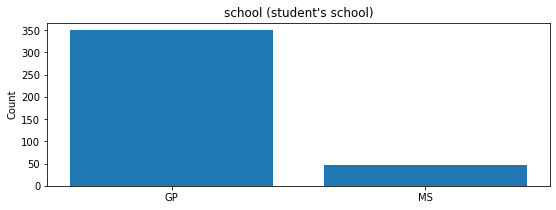

school:
MS     46
GP    349
Name: school, dtype: int64


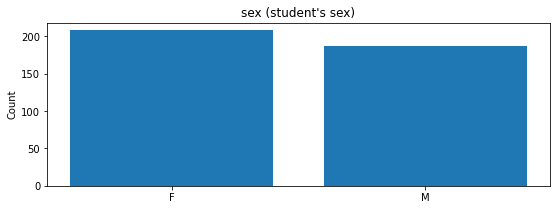

sex:
M    187
F    208
Name: sex, dtype: int64


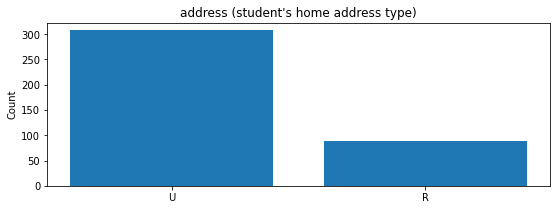

address:
R     88
U    307
Name: address, dtype: int64


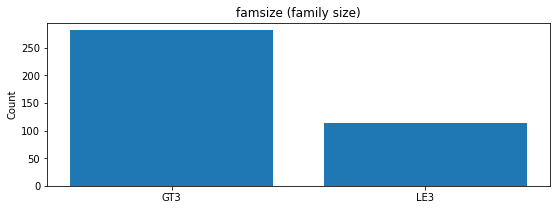

famsize:
LE3    114
GT3    281
Name: famsize, dtype: int64


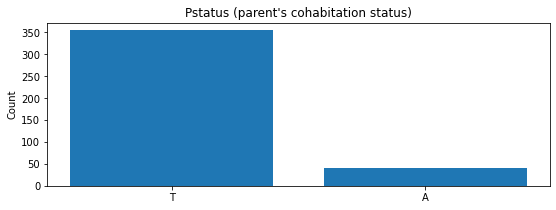

Pstatus:
A     41
T    354
Name: Pstatus, dtype: int64


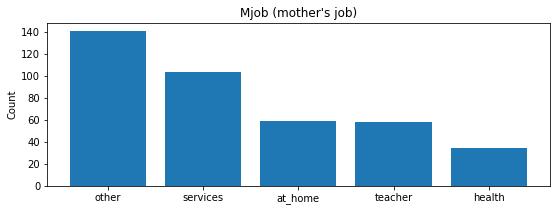

Mjob:
health       34
other       141
at_home      59
teacher      58
services    103
Name: Mjob, dtype: int64


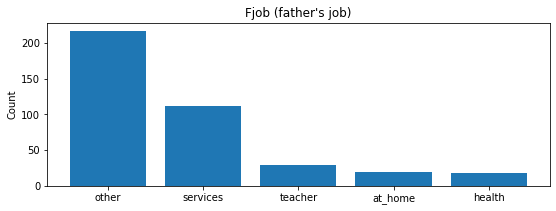

Fjob:
health       18
other       217
at_home      20
teacher      29
services    111
Name: Fjob, dtype: int64


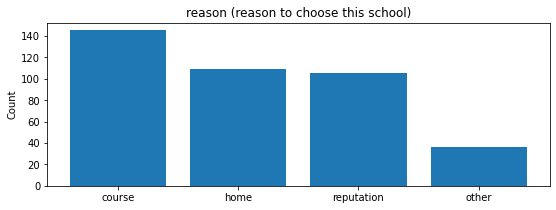

reason:
home          109
course        145
other          36
reputation    105
Name: reason, dtype: int64


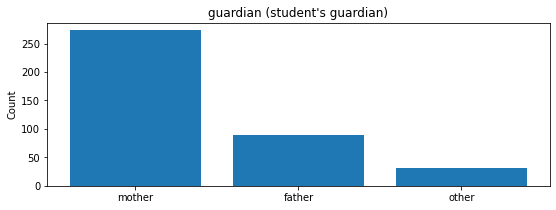

guardian:
father     90
other      32
mother    273
Name: guardian, dtype: int64


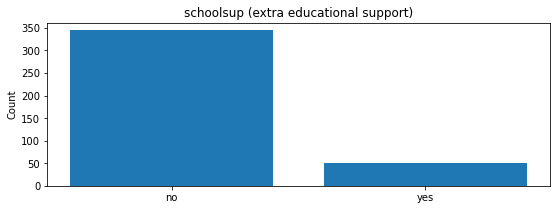

schoolsup:
no     344
yes     51
Name: schoolsup, dtype: int64


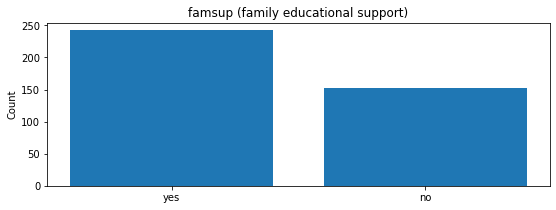

famsup:
no     153
yes    242
Name: famsup, dtype: int64


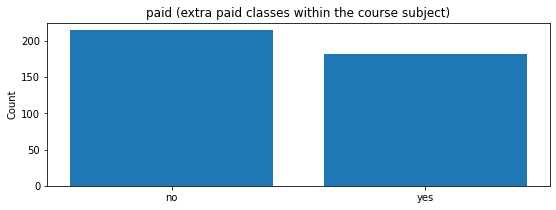

paid:
no     214
yes    181
Name: paid, dtype: int64


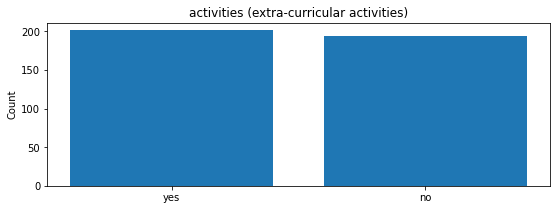

activities:
no     194
yes    201
Name: activities, dtype: int64


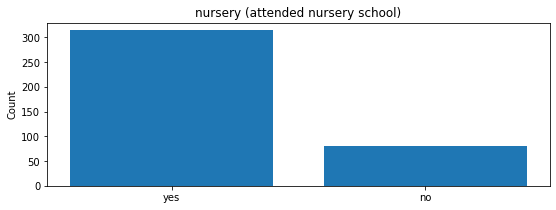

nursery:
no      81
yes    314
Name: nursery, dtype: int64


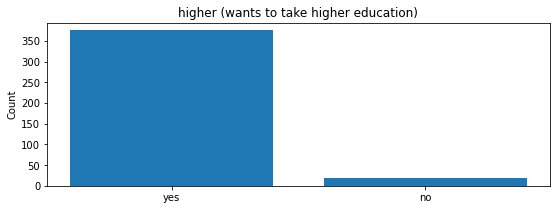

higher:
no      20
yes    375
Name: higher, dtype: int64


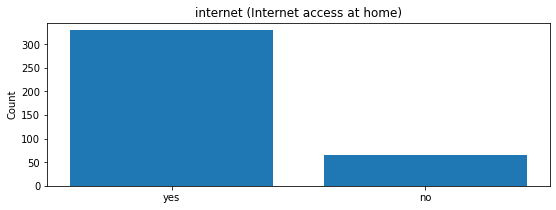

internet:
no      66
yes    329
Name: internet, dtype: int64


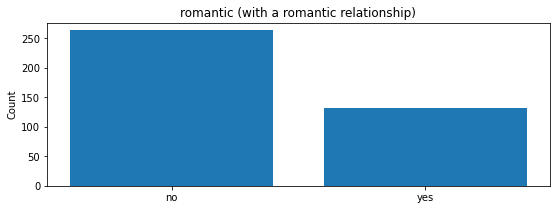

romantic:
no     263
yes    132
Name: romantic, dtype: int64


In [10]:
for feature in categorical_lst:
    barplot(feature)

Features with more than two unique values ("Mjob" - Mother's job, "Fjob" - Father's job, "Reason" - reason for choosing particular school, "guardian" - Person being student's guardian) are not ordinal and therefore will later be one-hot encoded (not label enconded).

<b> For our numerical features plotting bar plots will be preferred as well because of having discrete values and few unique values.

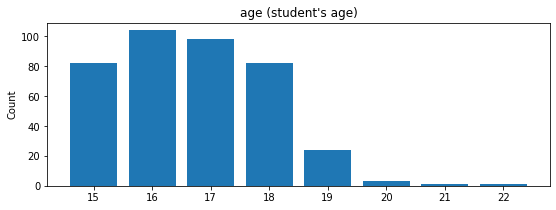

age:
15     82
16    104
17     98
18     82
19     24
20      3
21      1
22      1
Name: age, dtype: int64


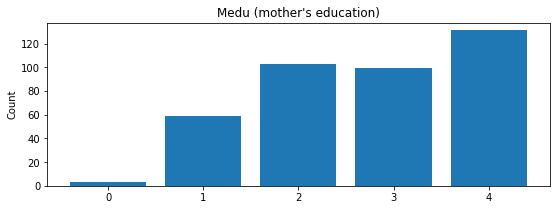

Medu:
0      3
1     59
2    103
3     99
4    131
Name: Medu, dtype: int64


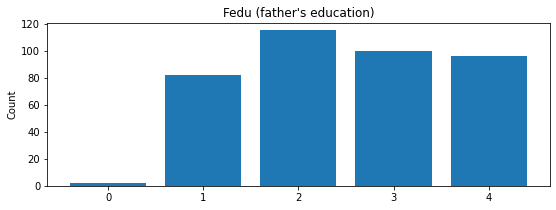

Fedu:
0      2
1     82
2    115
3    100
4     96
Name: Fedu, dtype: int64


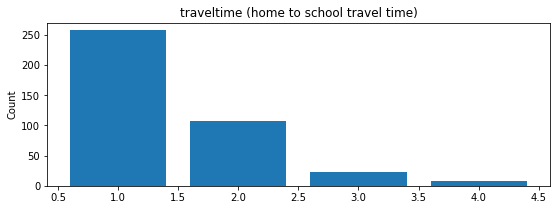

traveltime:
1    257
2    107
3     23
4      8
Name: traveltime, dtype: int64


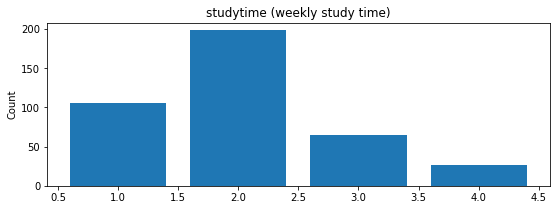

studytime:
1    105
2    198
3     65
4     27
Name: studytime, dtype: int64


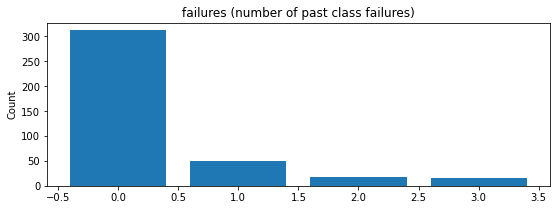

failures:
0    312
1     50
2     17
3     16
Name: failures, dtype: int64


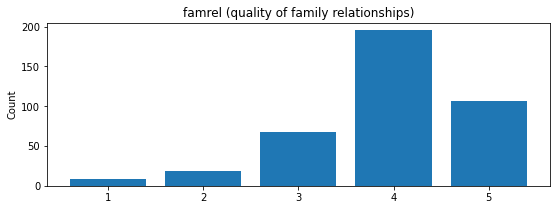

famrel:
1      8
2     18
3     68
4    195
5    106
Name: famrel, dtype: int64


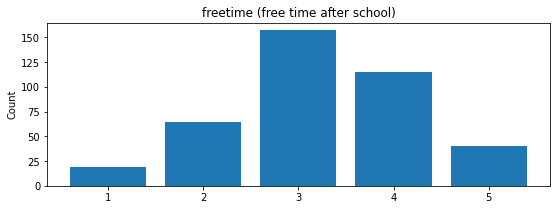

freetime:
1     19
2     64
3    157
4    115
5     40
Name: freetime, dtype: int64


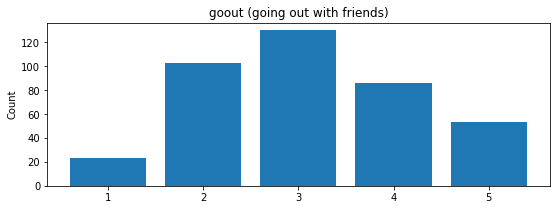

goout:
1     23
2    103
3    130
4     86
5     53
Name: goout, dtype: int64


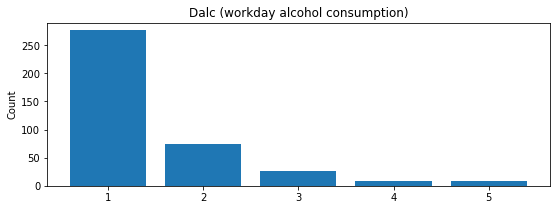

Dalc:
1    276
2     75
3     26
4      9
5      9
Name: Dalc, dtype: int64


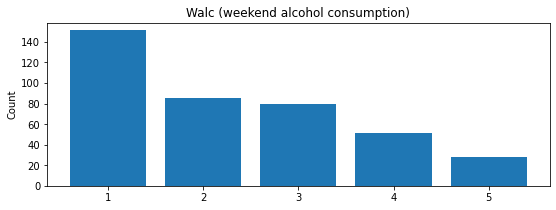

Walc:
1    151
2     85
3     80
4     51
5     28
Name: Walc, dtype: int64


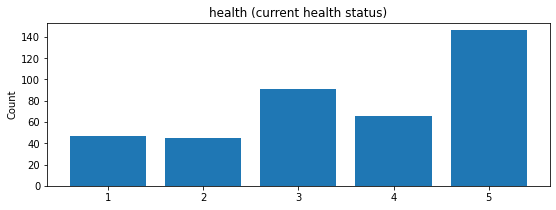

health:
1     47
2     45
3     91
4     66
5    146
Name: health, dtype: int64


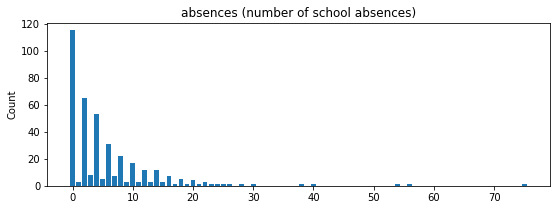

absences:
0     115
1       3
2      65
3       8
4      53
5       5
6      31
7       7
8      22
9       3
10     17
11      3
12     12
13      3
14     12
15      3
16      7
17      1
18      5
19      1
20      4
21      1
22      3
23      1
24      1
25      1
26      1
28      1
30      1
38      1
40      1
54      1
56      1
75      1
Name: absences, dtype: int64


In [11]:
for feature in numerical_lst[:-3]:
    barplot(feature)

<b>It seems to be an issue with data collected for absences (maybe every class is 2-hours long and skipping uneven number of hours is hard to accomplish). Using histogram might be more useful for plotting absences.</b><br>
Spread between minimal (0) and maximal (75) values is 75. Let's implement 38 bins in order to "pair" even and uneven values.

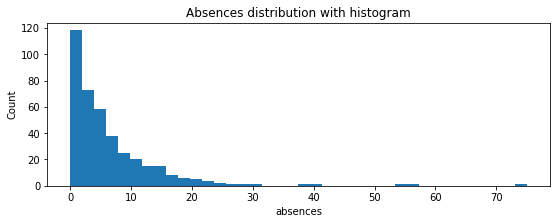

Absences:
0     115
1       3
2      65
3       8
4      53
5       5
6      31
7       7
8      22
9       3
10     17
11      3
12     12
13      3
14     12
15      3
16      7
17      1
18      5
19      1
20      4
21      1
22      3
23      1
24      1
25      1
26      1
28      1
30      1
38      1
40      1
54      1
56      1
75      1
Name: absences, dtype: int64


In [12]:
plt.figure(figsize = (9,3))
plt.hist(dataset["absences"], bins = 38)
plt.xlabel("absences")
plt.ylabel("Count")
plt.title("Absences distribution with histogram")
plt.show()
print("Absences:\n{}".format(dataset["absences"].value_counts(sort=False)))

Distribution of data is skewed. There might be the need to scale the values to logarithmic scale.<br>
Students with considerably higher (maybe over 30?) absence count should probably be dropped from dataset. I will take care of it later.

In [13]:
#Here is a quick look on students with highest number of absences (38, 40, 54, 56, 75 - ascending)
dataset[dataset["absences"]>30].sort_values(by="absences")
#They scored low scores during exams, but not the lowest.

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
307     GP   M   19       U     GT3       T     4     4  teacher  services   
315     GP   F   19       R     GT3       T     2     3    other     other   
74      GP   F   16       U     GT3       T     3     3    other  services   
183     GP   F   17       U     LE3       T     3     3    other     other   
276     GP   F   18       R     GT3       A     3     2    other  services   

         reason guardian  traveltime  studytime  failures schoolsup famsup  \
307  reputation    other           2          1         1        no    yes   
315  reputation    other           1          3         1        no     no   
74         home   mother           1          2         0       yes    yes   
183  reputation   mother           1          2         0        no    yes   
276        home   mother           2          2         0        no     no   

    paid activities nursery higher internet romantic  famrel  freetime  goout  \
307  yes         no     yes    yes      yes      yes       4         3      4   
315   no         no     yes    yes      yes      yes       4         1      2   
74   yes        yes     yes    yes      yes       no       4         3      3   
183   no        yes     yes    yes      yes      yes       5         3      3   
276   no         no      no     no      yes      yes       4         1      1   

     Dalc  Walc  health  absences  G1  G2  G3  
307     1     1       4        38   8   9   8  
315     1     1       3        40  13  11  11  
74      2     4       5        54  11  12  11  
183     2     3       1        56   9   9   8  
276     1     1       5        75  10   9   9

<b>Last basic plots of period grades' distribution.

first period grade:



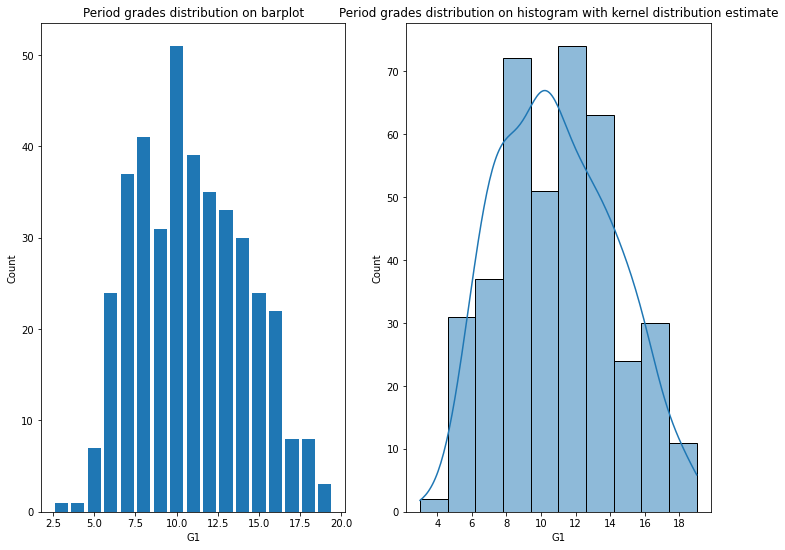

first period grade:
3      1
4      1
5      7
6     24
7     37
8     41
9     31
10    51
11    39
12    35
13    33
14    30
15    24
16    22
17     8
18     8
19     3
Name: G1, dtype: int64
second period grade:



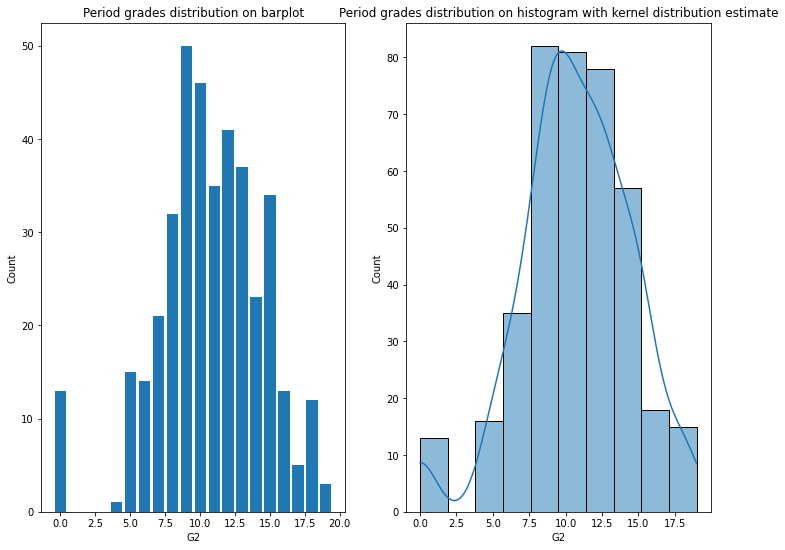

second period grade:
0     13
4      1
5     15
6     14
7     21
8     32
9     50
10    46
11    35
12    41
13    37
14    23
15    34
16    13
17     5
18    12
19     3
Name: G2, dtype: int64
third period grade:



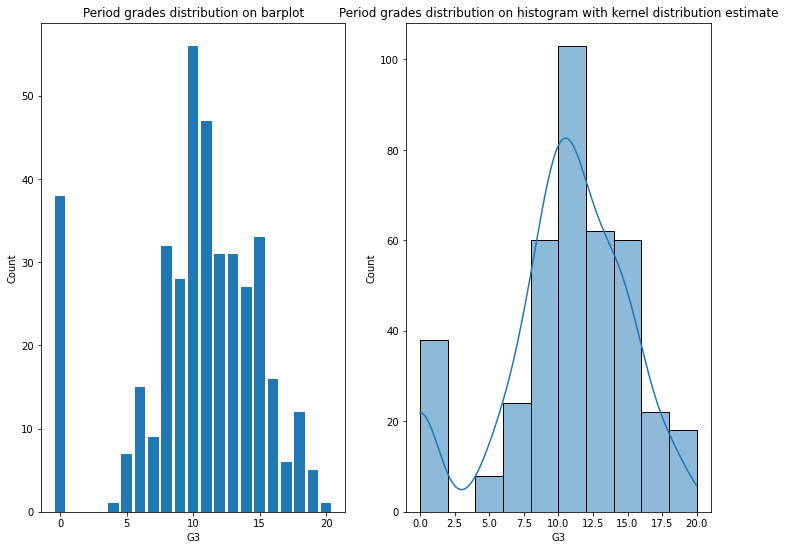

third period grade:
0     38
4      1
5      7
6     15
7      9
8     32
9     28
10    56
11    47
12    31
13    31
14    27
15    33
16    16
17     6
18    12
19     5
20     1
Name: G3, dtype: int64


In [14]:
for Gx in ["G1", "G2", "G3"]:
    print("{}:\n".format(featuresNames[Gx]))
    plt.figure(figsize=(12,9))
    plt.subplot(1,2,1)
    plt.bar(dataset[Gx].value_counts().index, dataset[Gx].value_counts())
    plt.xlabel(Gx)
    plt.ylabel("Count")
    plt.title("Period grades distribution on barplot")
    plt.subplot(1,2,2)
    sns.histplot(dataset[Gx], bins = 10, kde=True)
    plt.xlabel(Gx)
    plt.ylabel("Count")
    plt.title("Period grades distribution on histogram with kernel distribution estimate")
    plt.show()
    print("{}:\n{}".format(featuresNames[Gx], dataset[Gx].value_counts(sort=False)))

This amount of 0 grades create an impression that this is some kind of error or abnormal grading conditions. Let us look at the students who scored zero in second and third period.

In [15]:
print(dataset[(dataset["G2"]==0) | (dataset["G3"]==0)])

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
128     GP   M   18       R     GT3       T     2     2  services     other   
130     GP   F   15       R     GT3       T     3     4  services   teacher   
131     GP   F   15       U     GT3       T     1     1   at_home     other   
134     GP   M   15       R     GT3       T     3     4   at_home   teacher   
135     GP   F   15       U     GT3       T     4     4  services   at_home   
136     GP   M   17       R     GT3       T     3     4   at_home     other   
137     GP   F   16       U     GT3       A     3     3     other     other   
140     GP   M   15       U     GT3       T     4     3   teacher  services   
144     GP   M   17       U     GT3       T     2     1     other     other   
146     GP   F   15       U     GT3       T     3     2    health  services   
148     GP   M   16       U     GT3       T     4     4   teacher   teacher   
150     GP   M   18       U     LE3       T     1   

We can see that all students who scored zero in the second period, scored zero in the third as well. This indicates that 0 grades are not a mistake. Those students might have just skipped classes but all of them have no absences.<br>
There is no clear conlusion but we should keep in mind that removing those examples might be useful.

<b>Now the dependencies between each feature and every period grade will be plotted. Because of small number of unique values for features (except for "absences", which will not be plotted here) and relatively big number of unique values for period grades, violin plots will be used.

student's school:



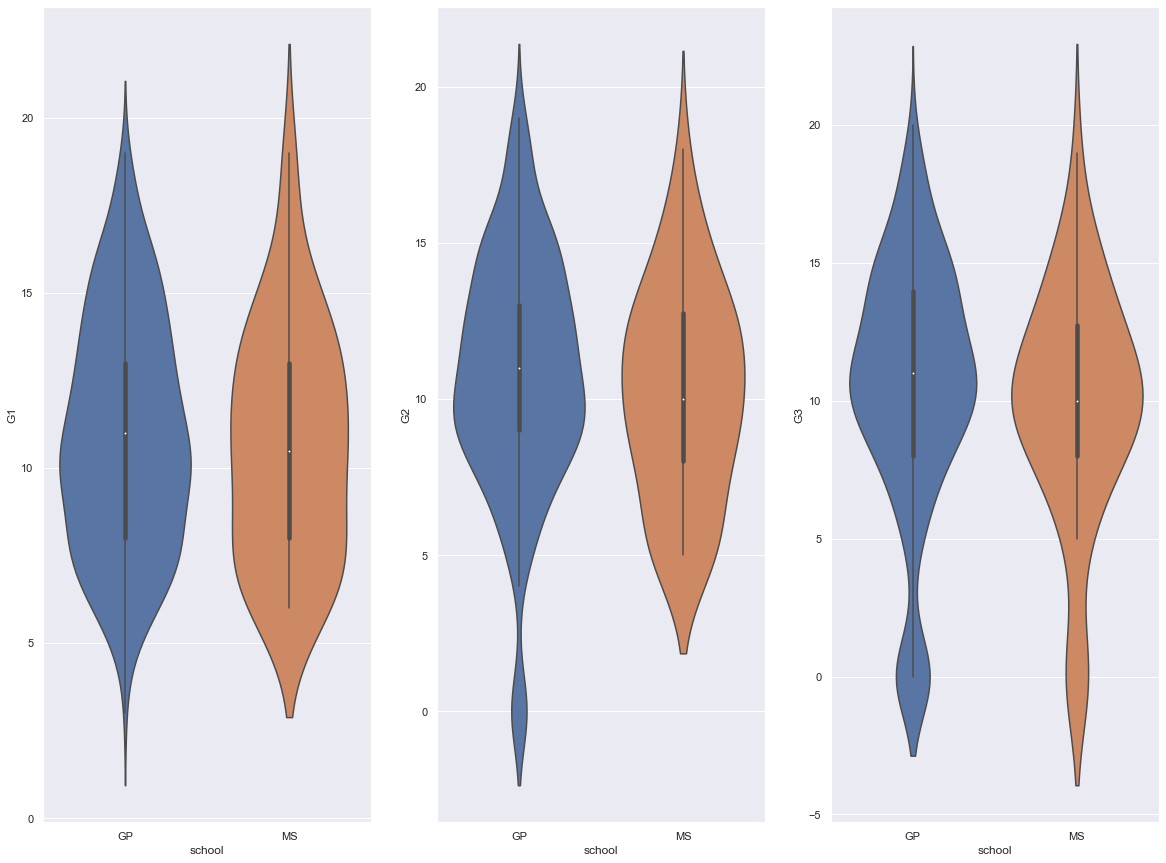

student's sex:



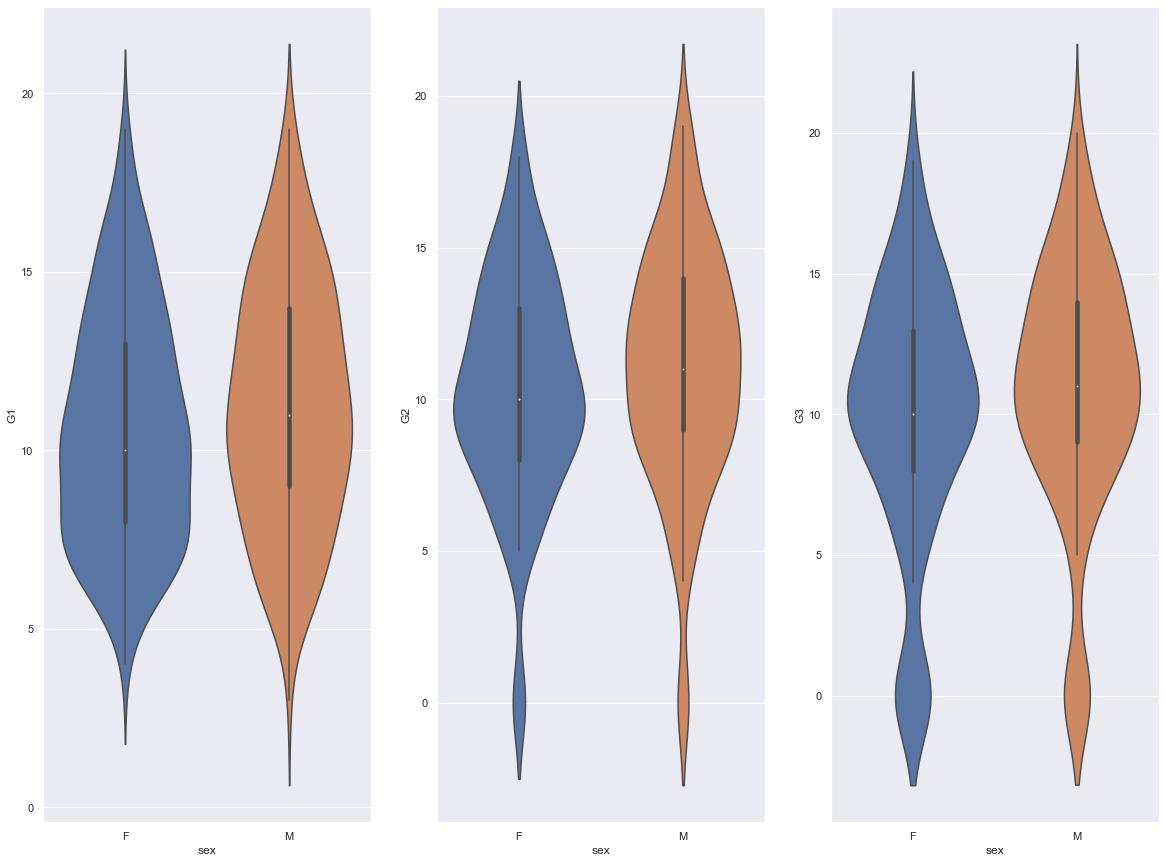

student's age:



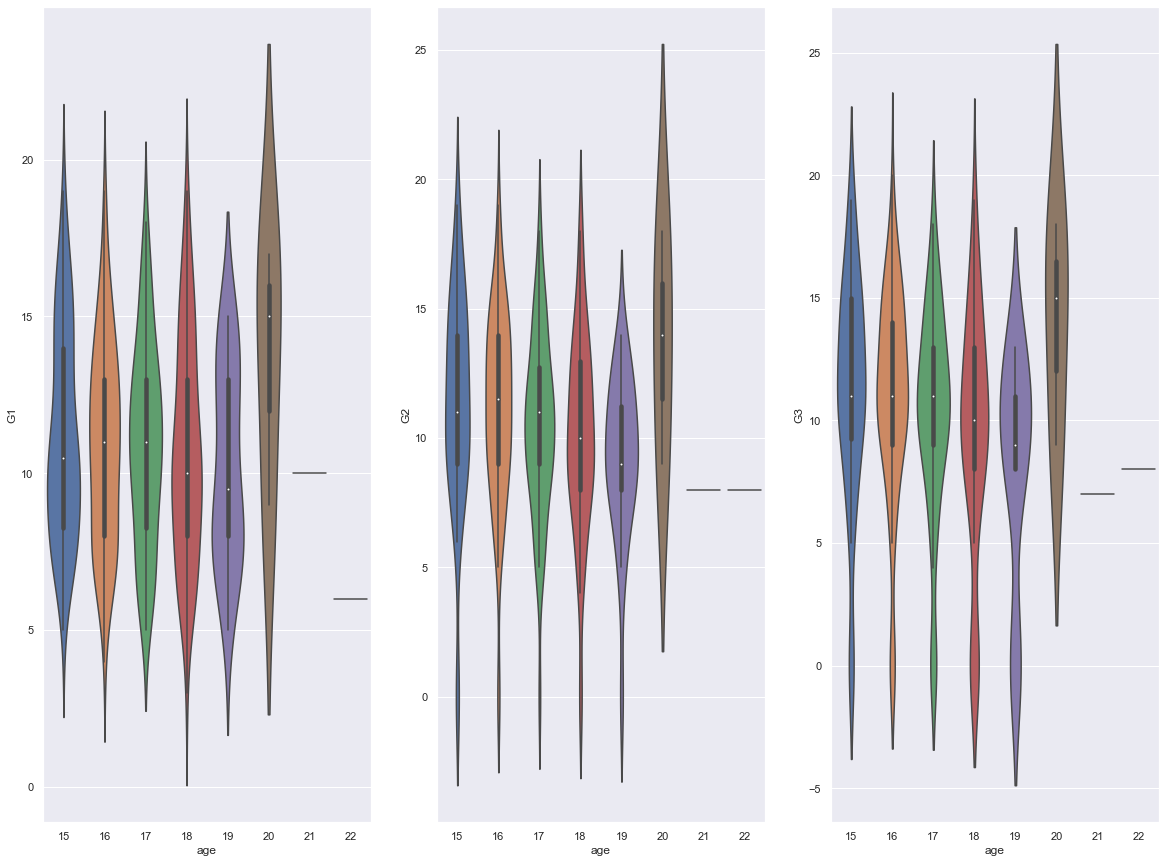

student's home address type:



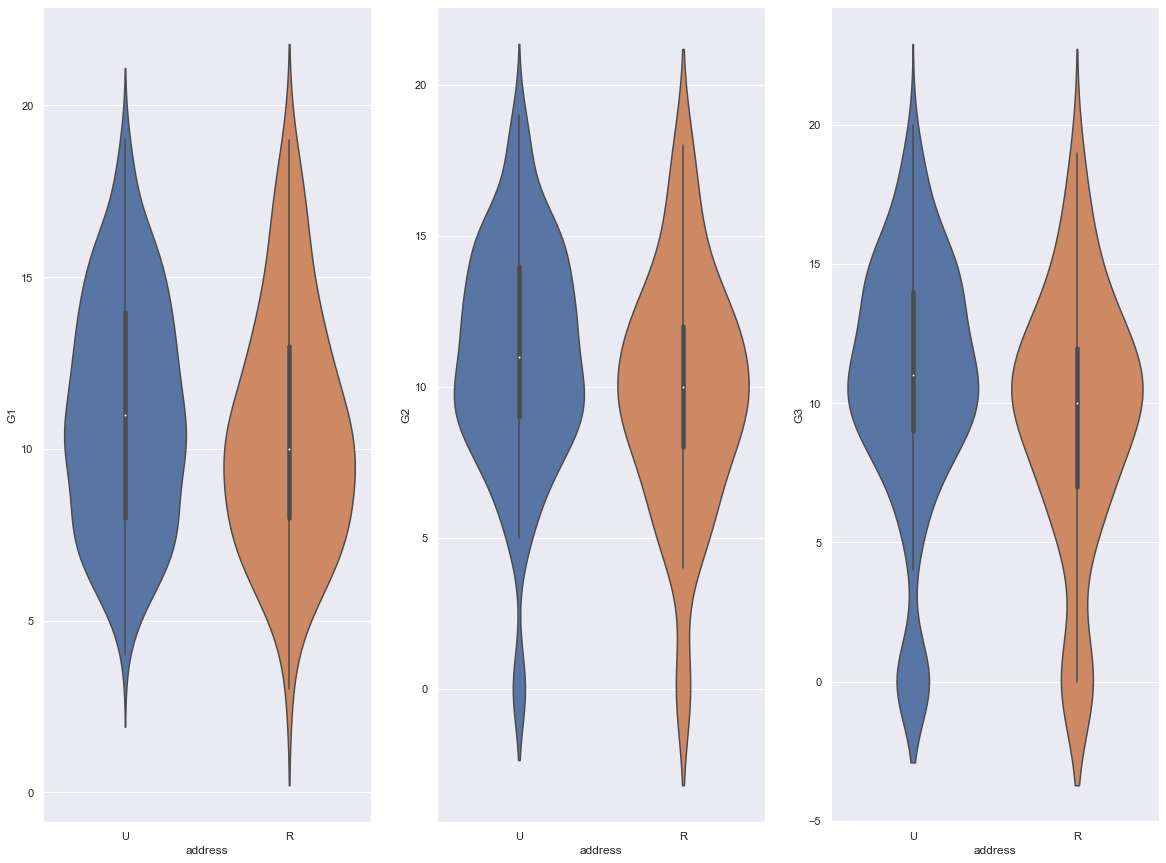

family size:



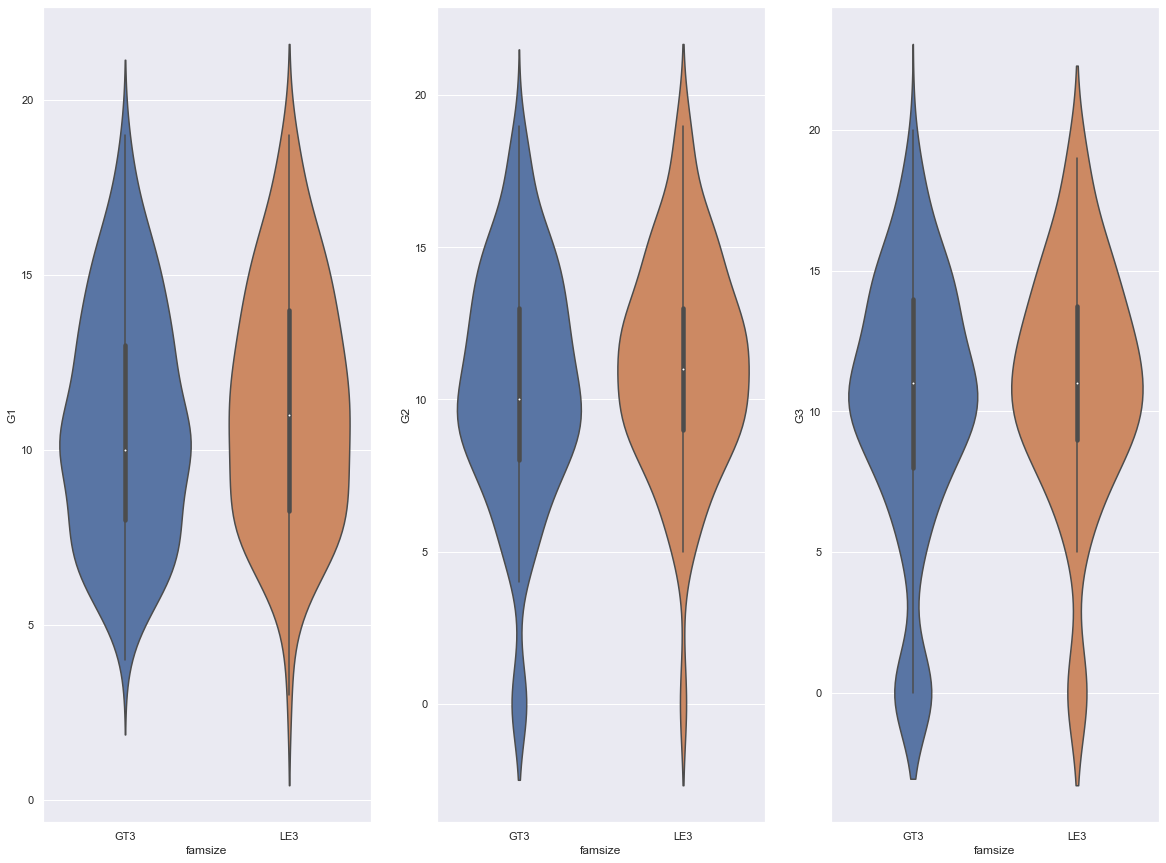

parent's cohabitation status:



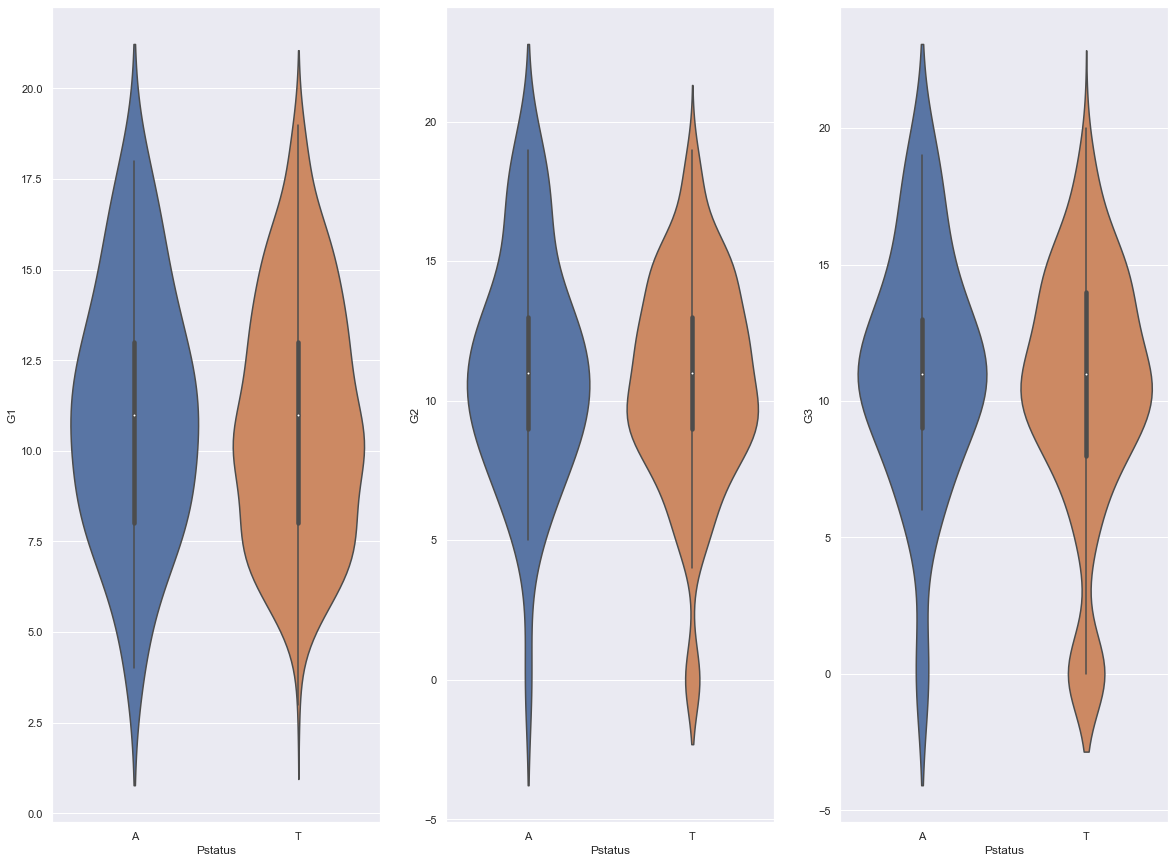

mother's education:



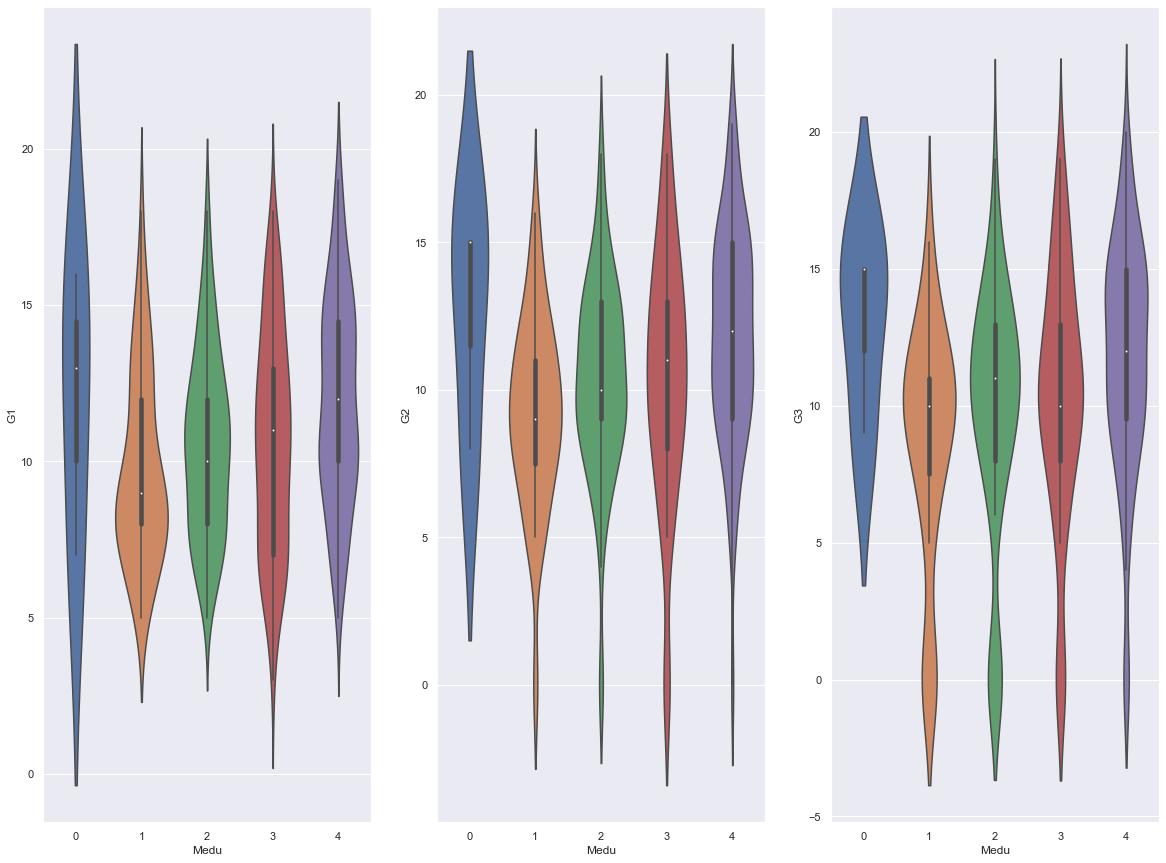

father's education:



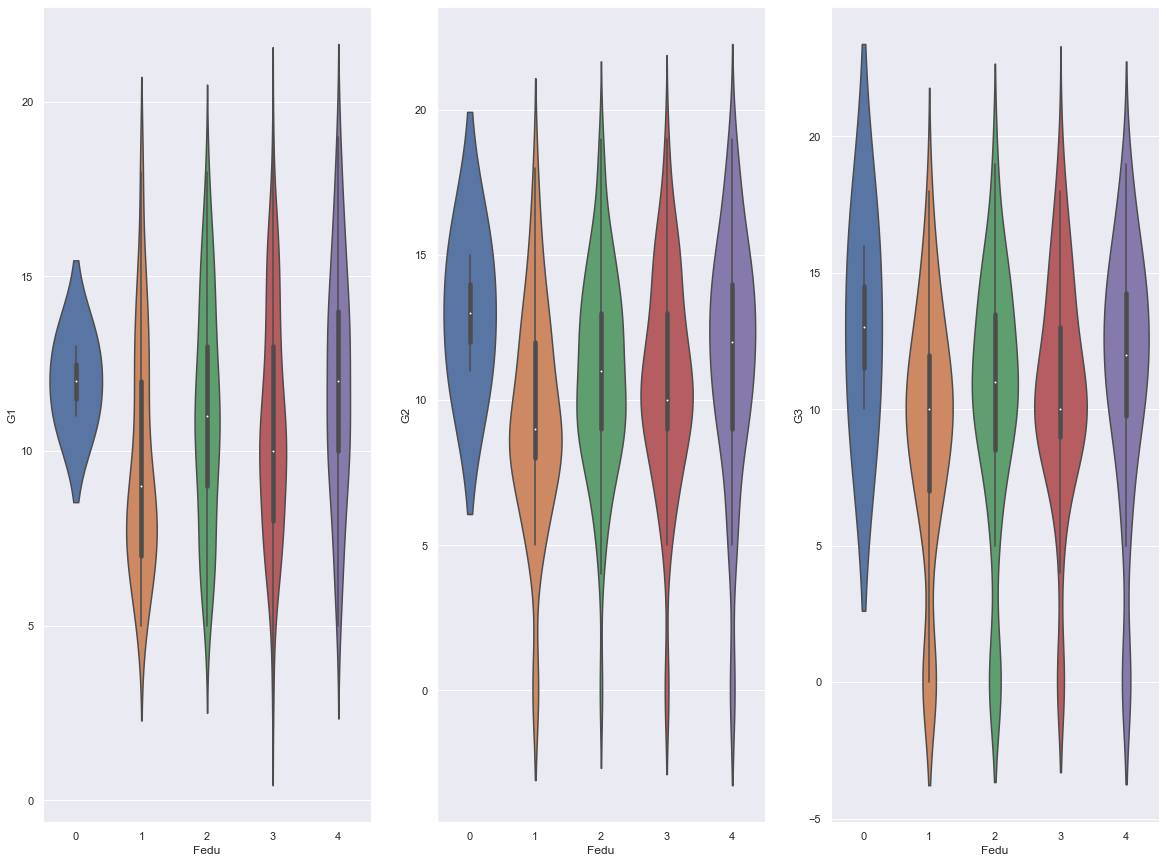

mother's job:



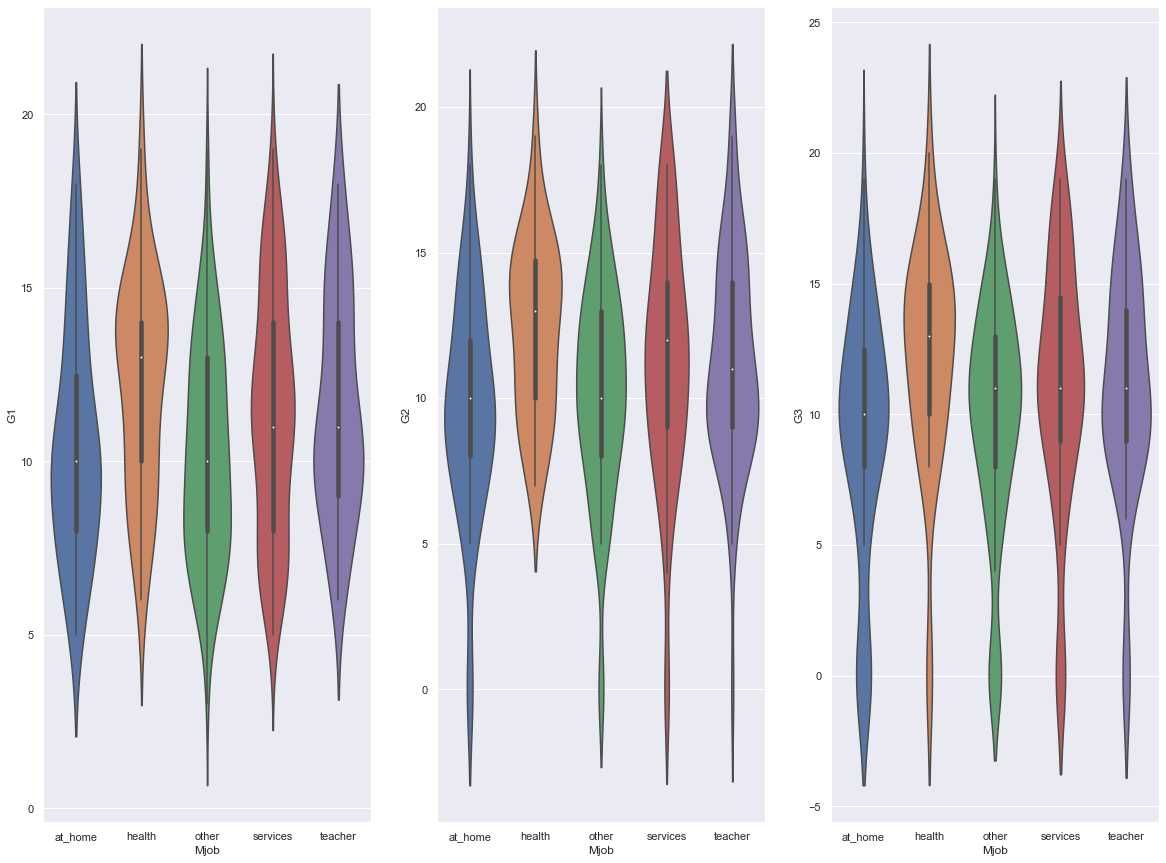

father's job:



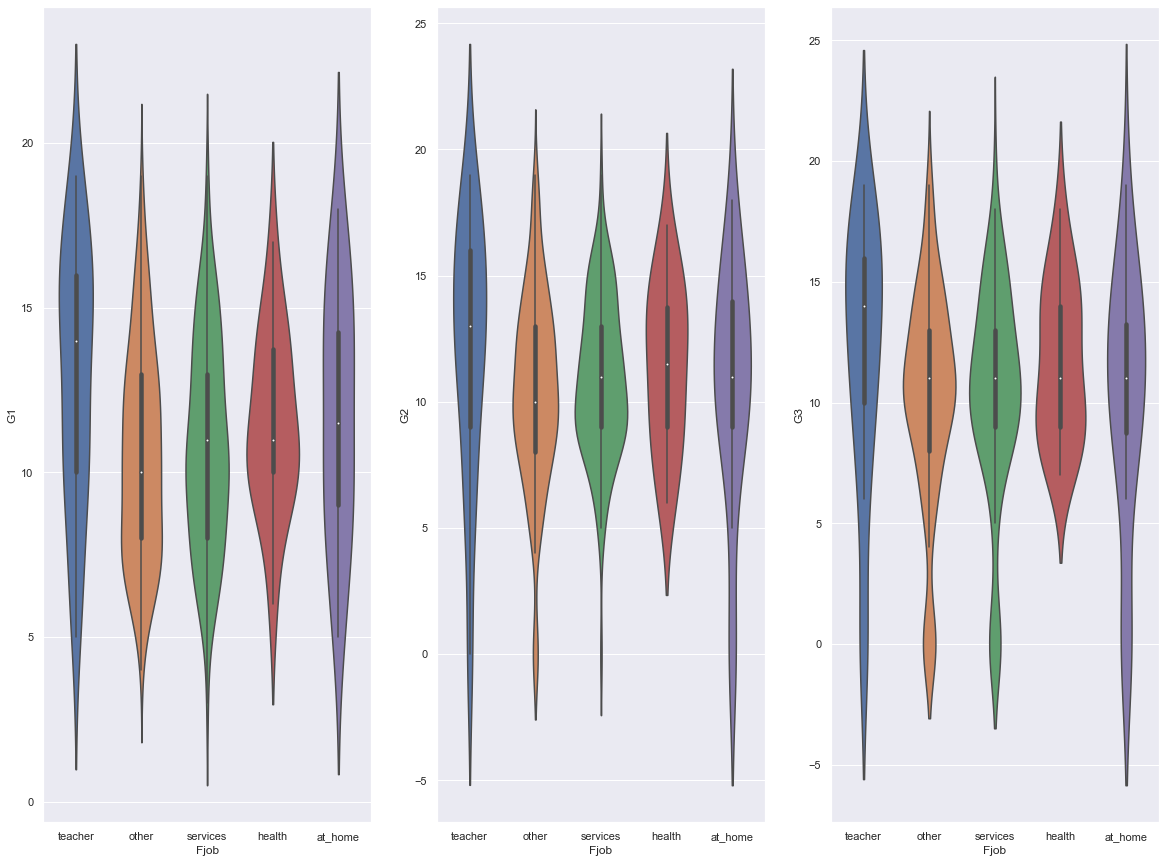

reason to choose this school:



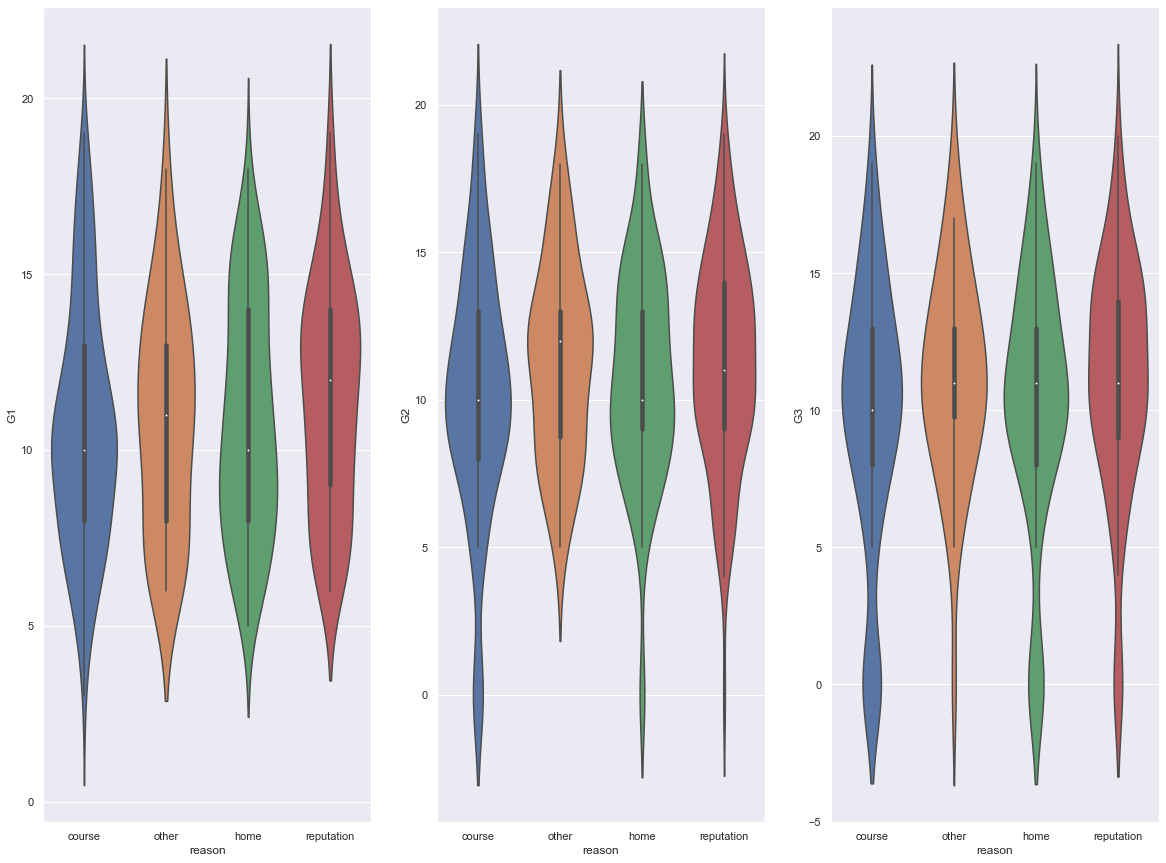

student's guardian:



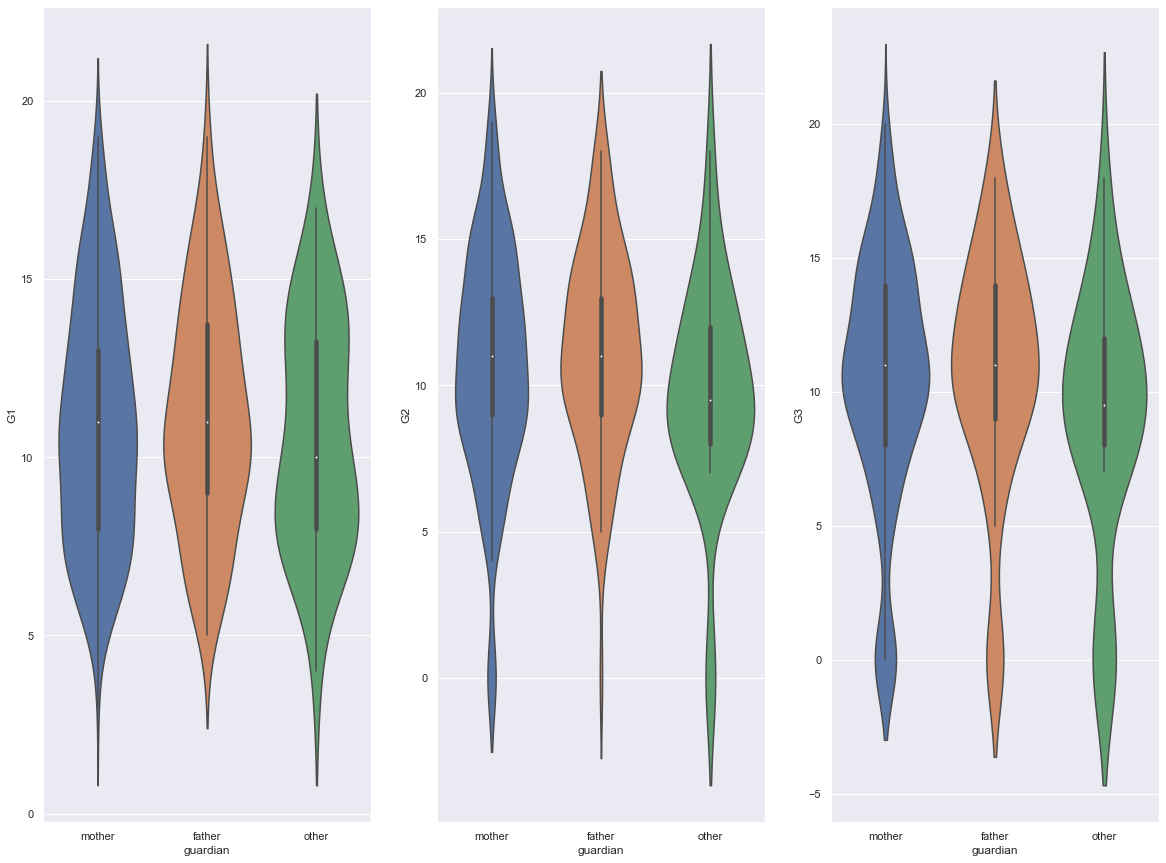

home to school travel time:



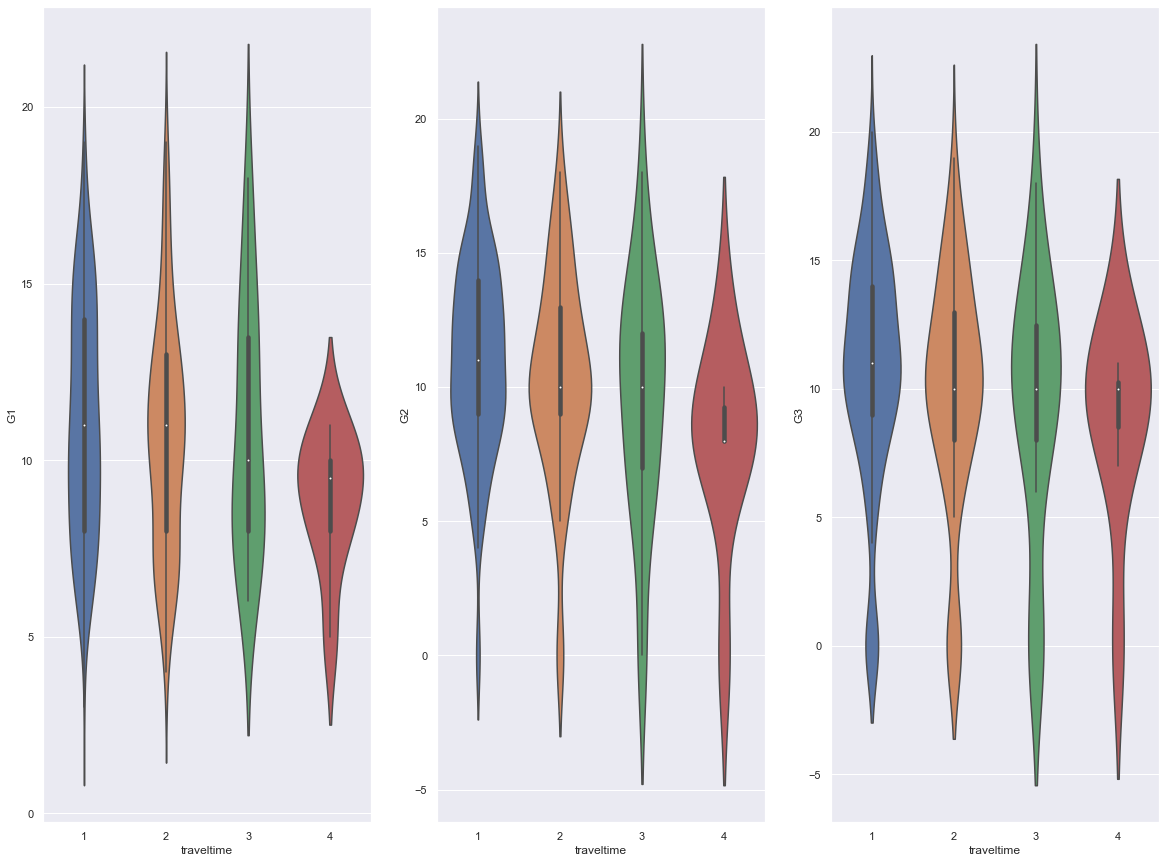

weekly study time:



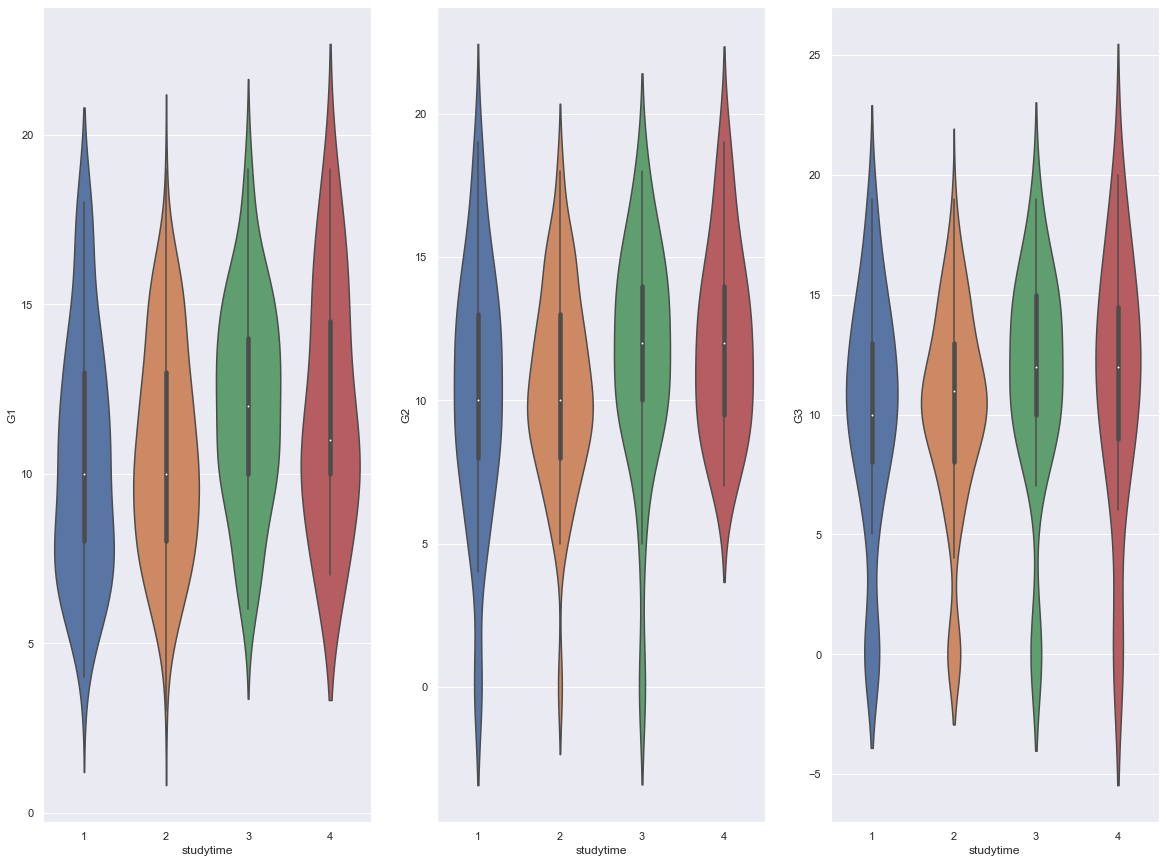

number of past class failures:



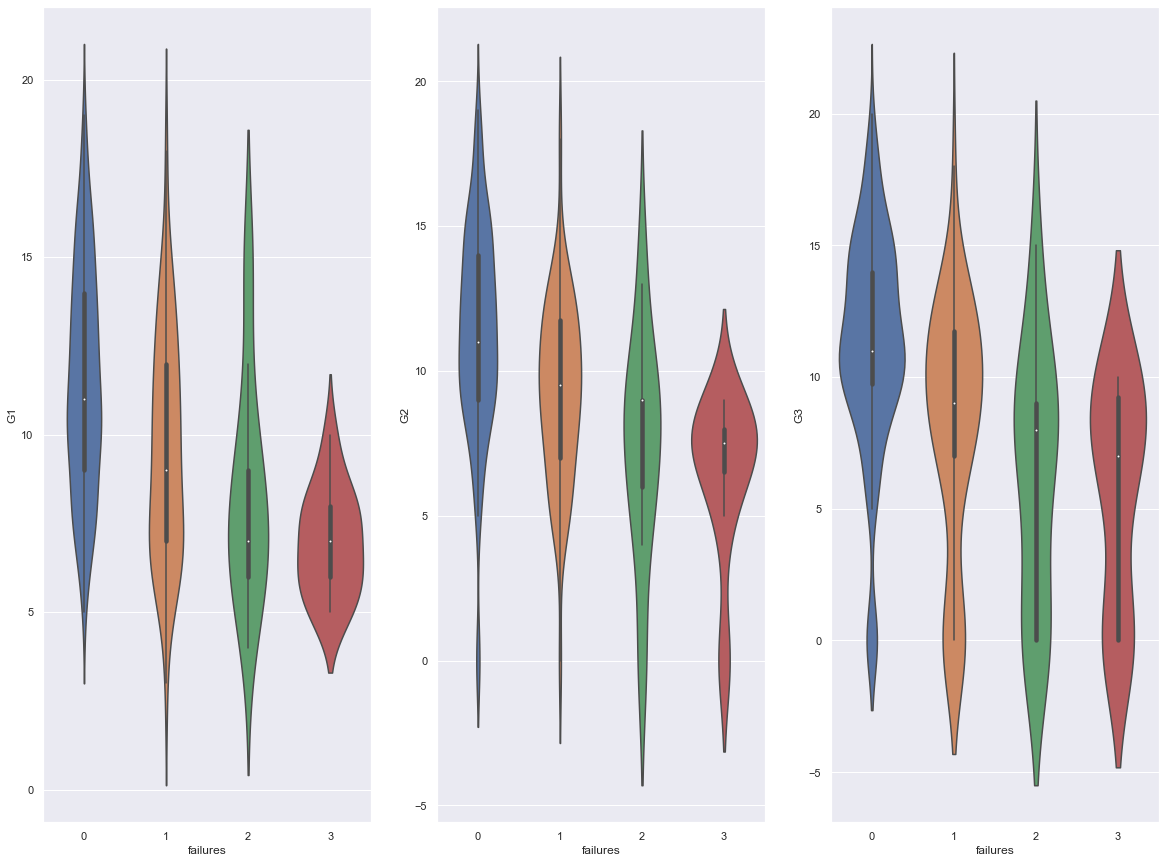

extra educational support:



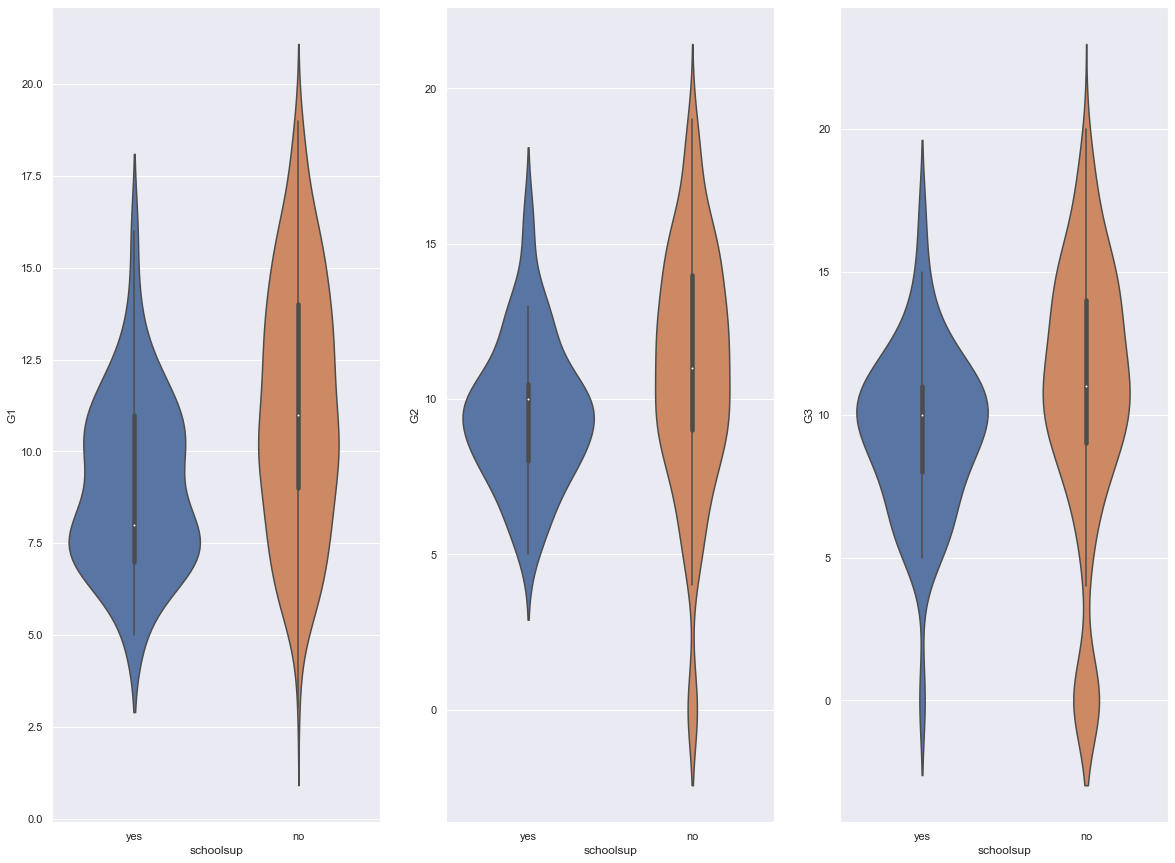

family educational support:



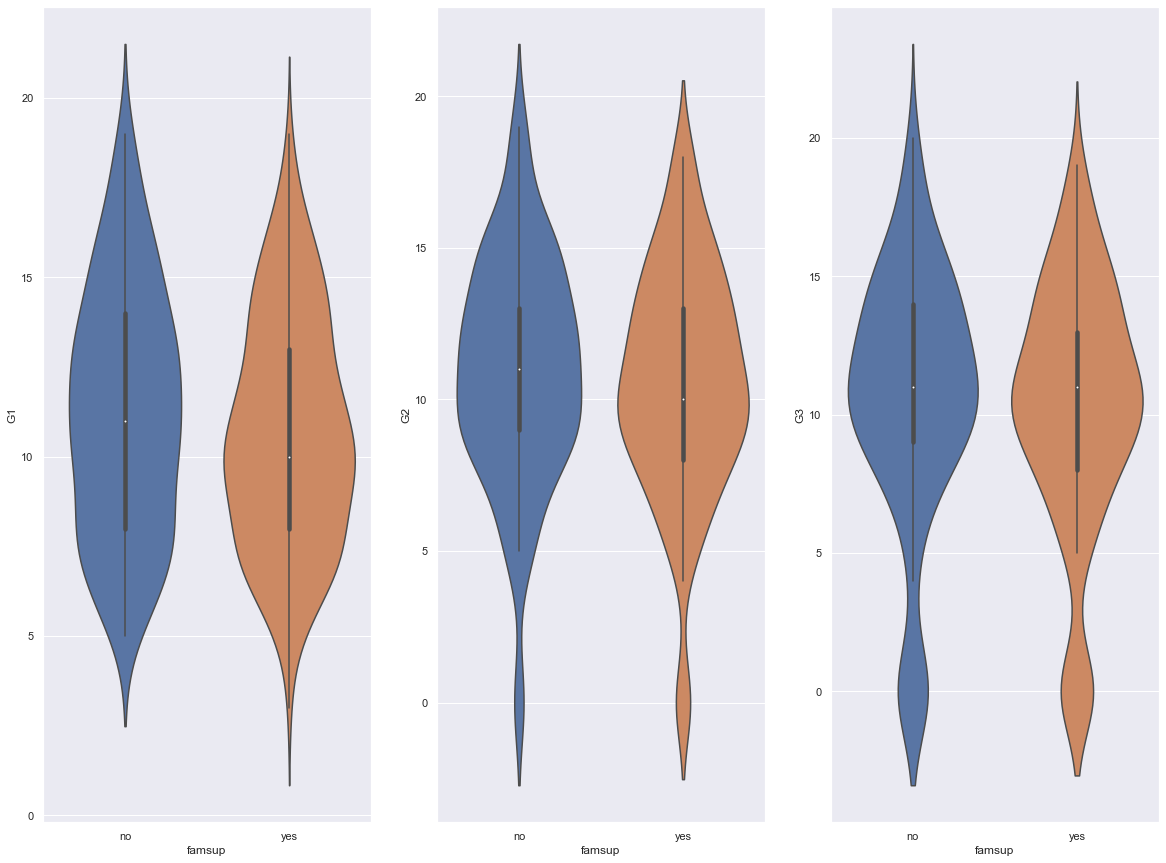

extra paid classes within the course subject:



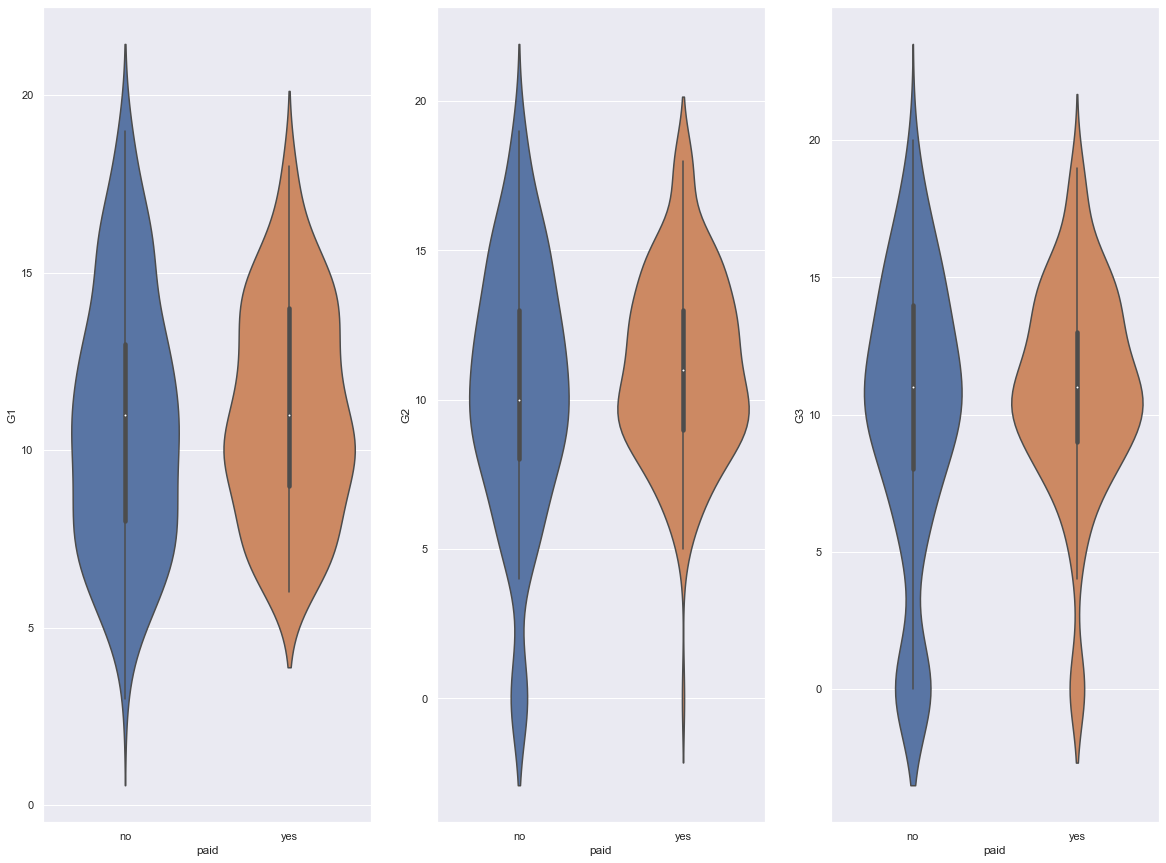

extra-curricular activities:



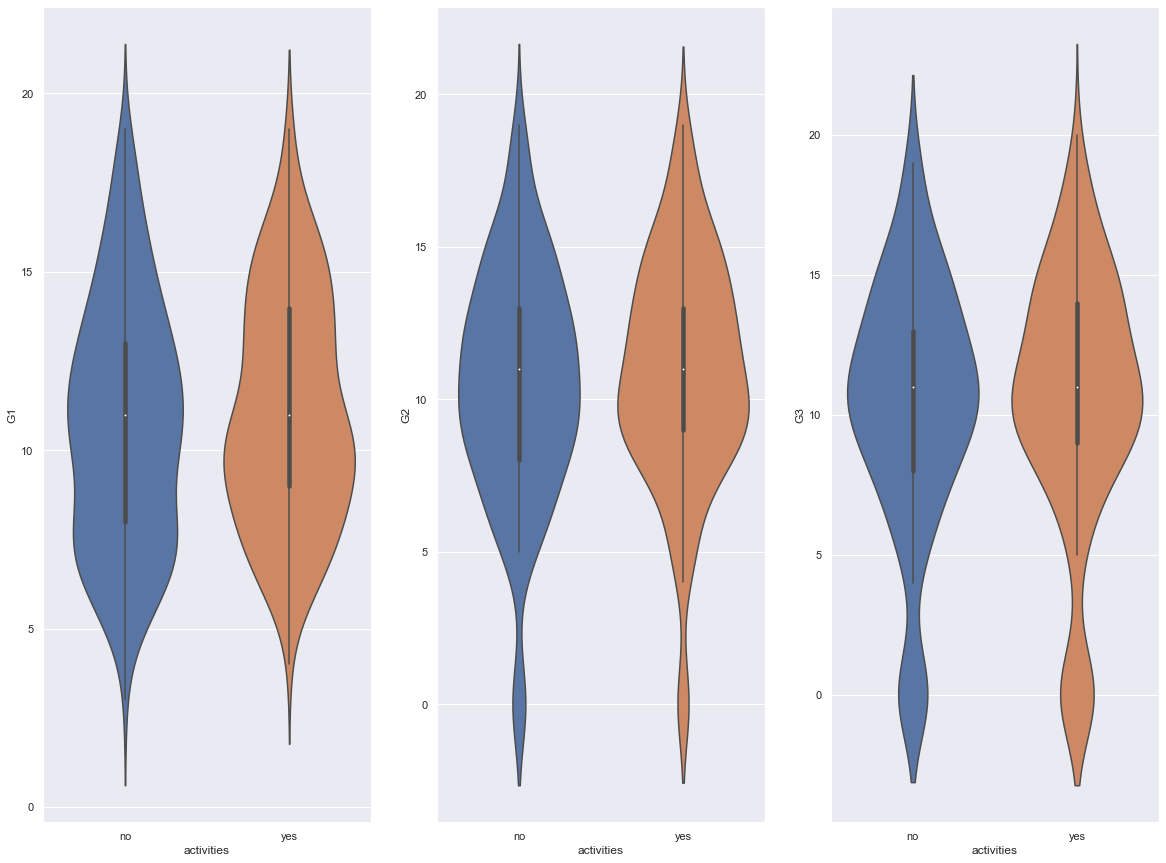

attended nursery school:



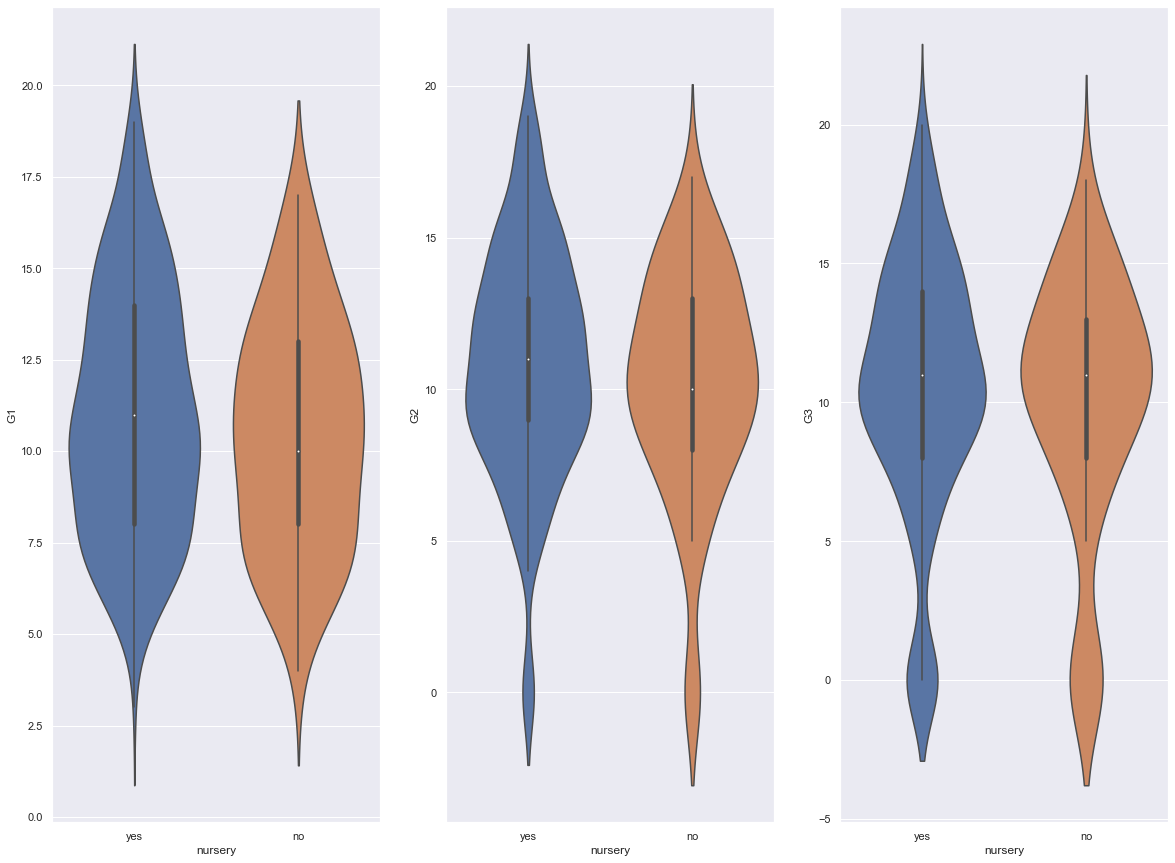

wants to take higher education:



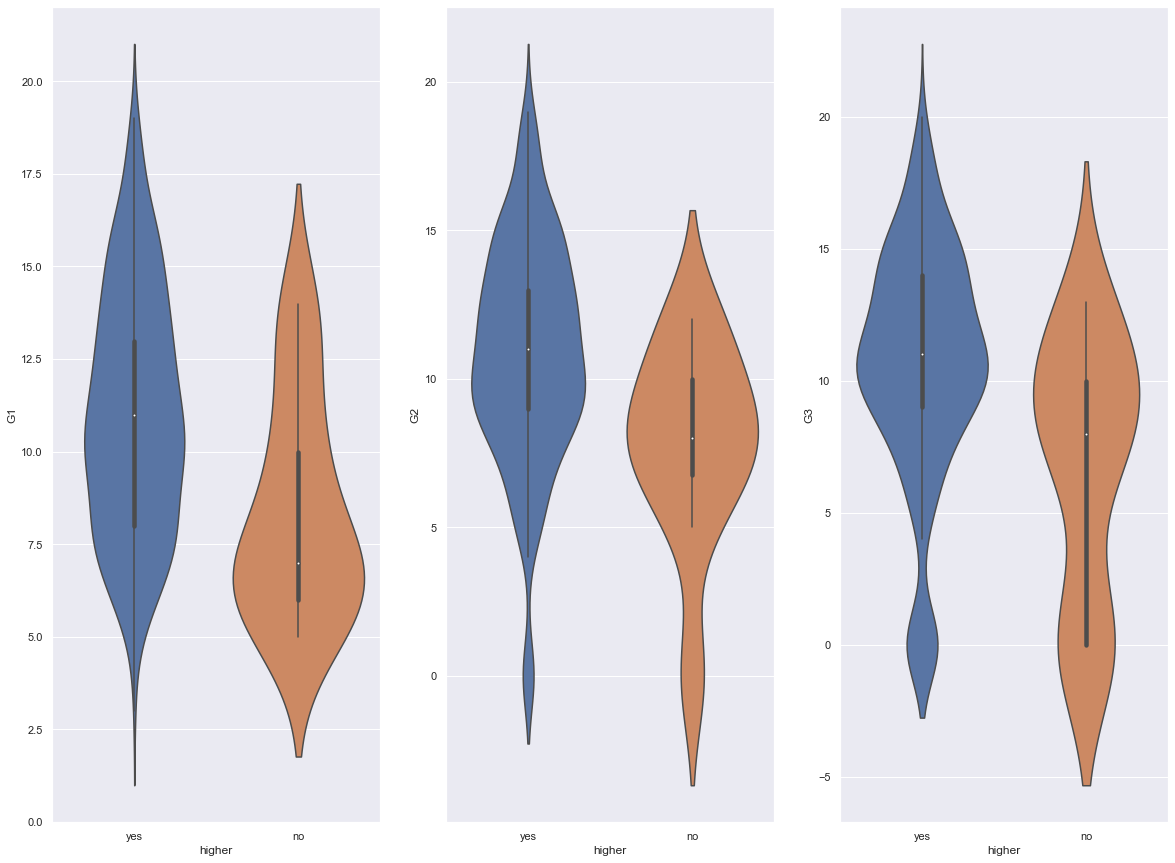

Internet access at home:



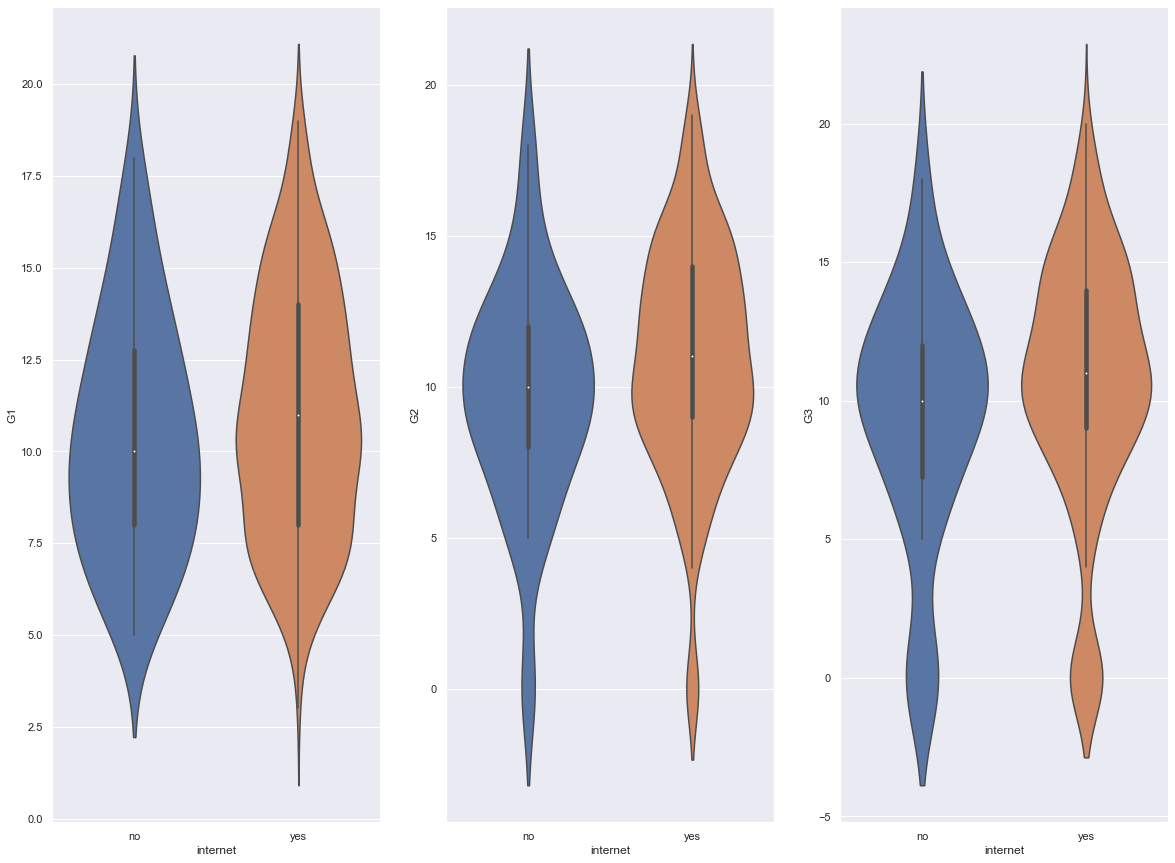

with a romantic relationship:



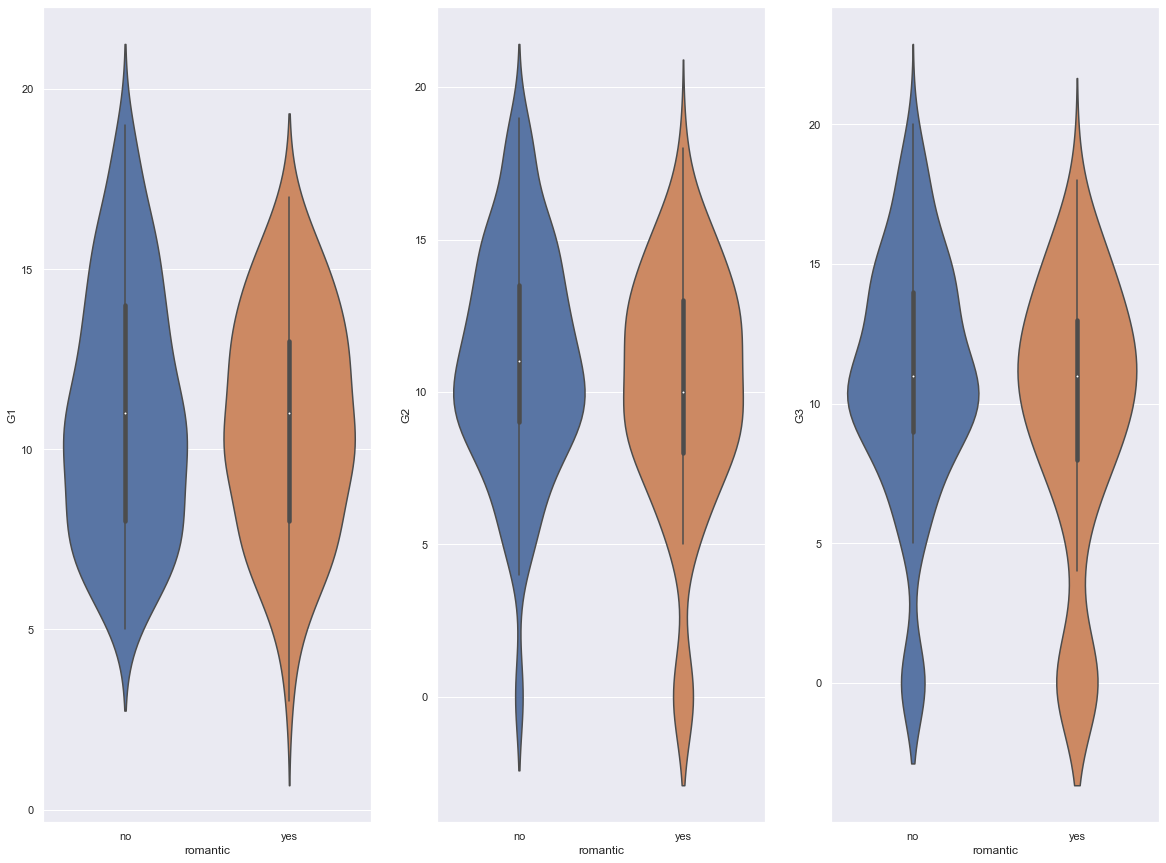

quality of family relationships:



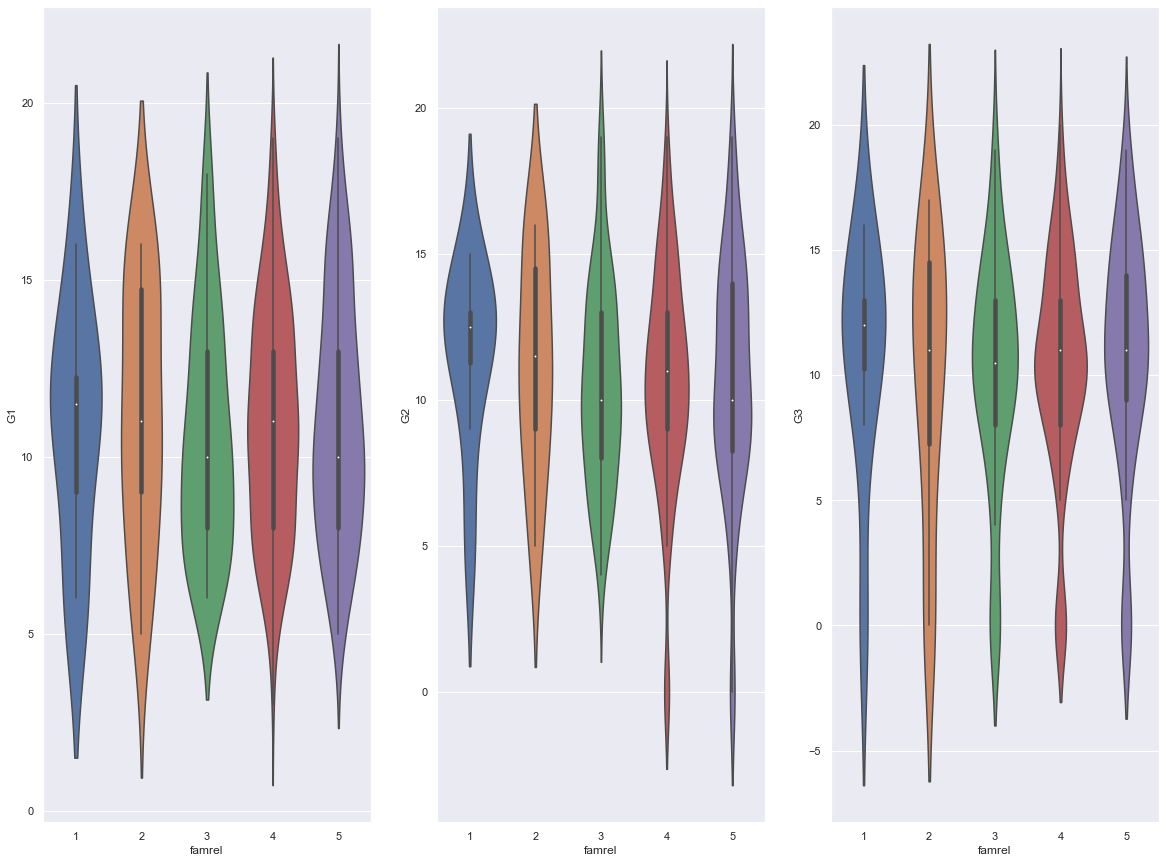

free time after school:



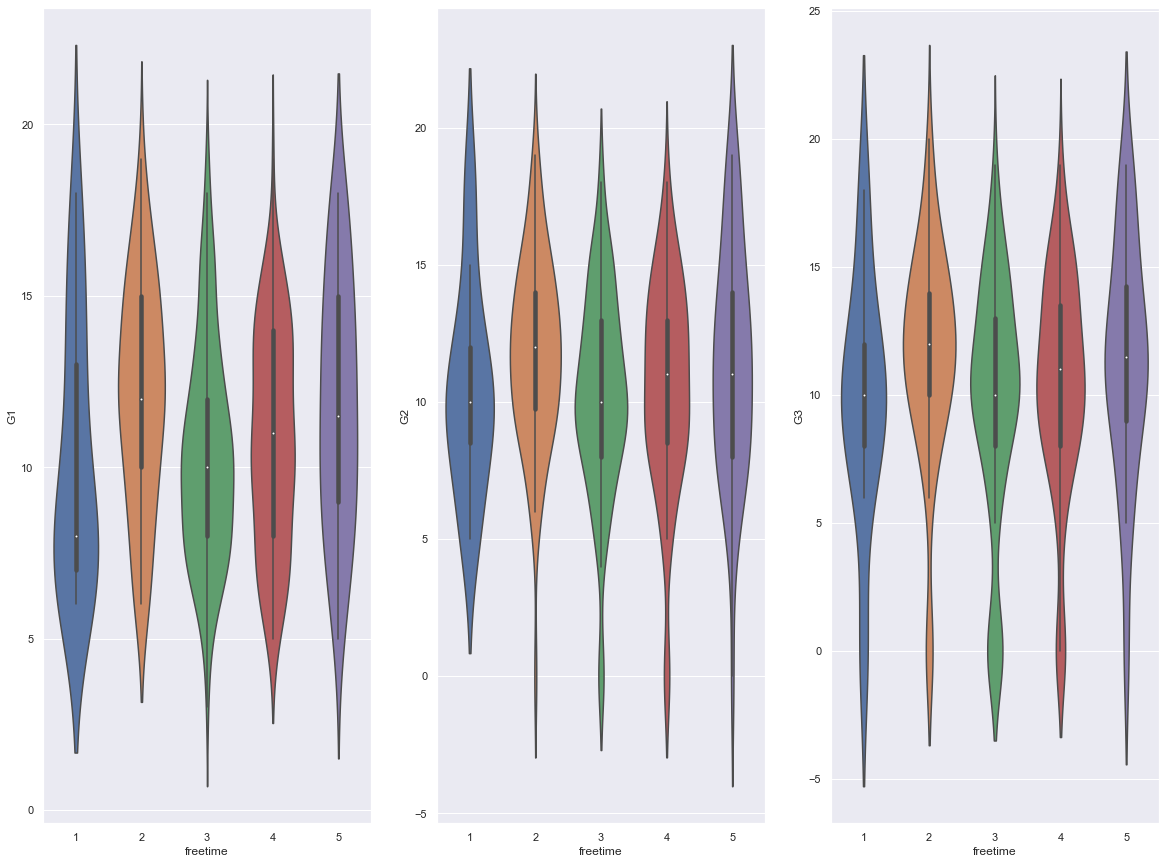

going out with friends:



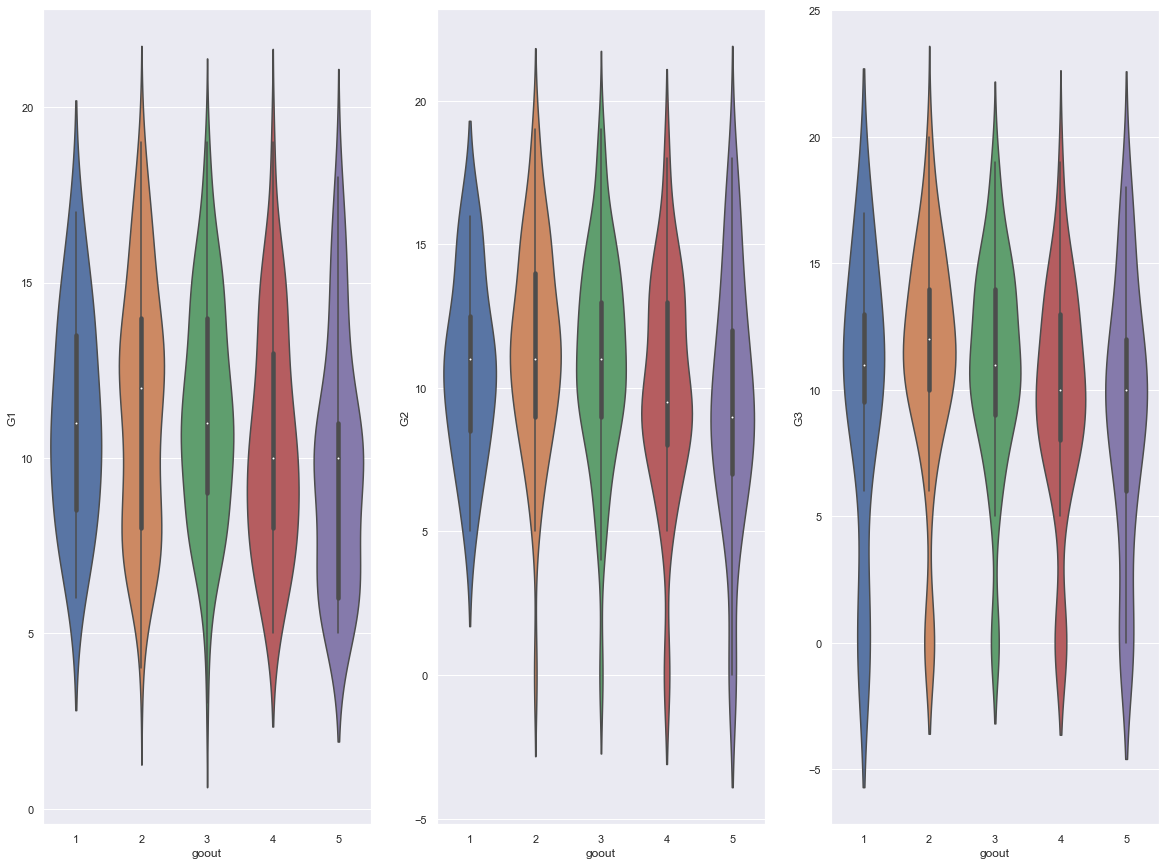

workday alcohol consumption:



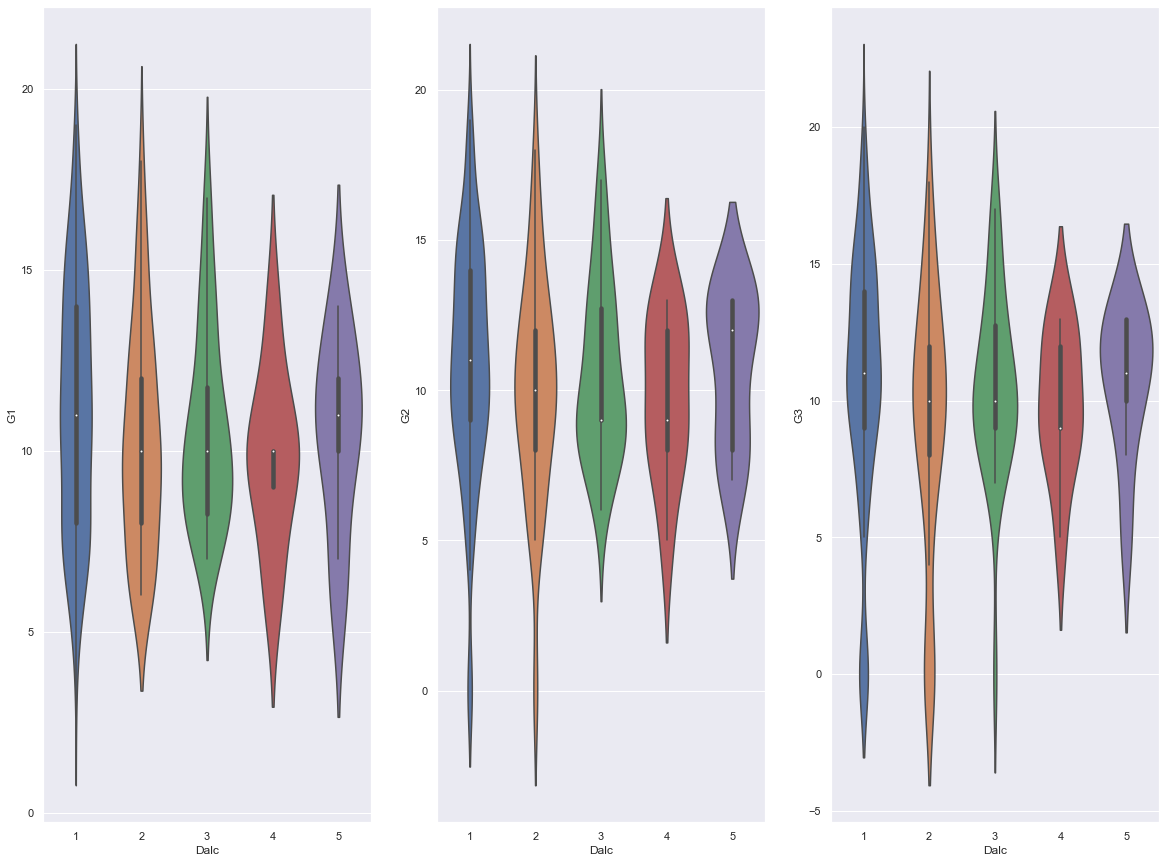

weekend alcohol consumption:



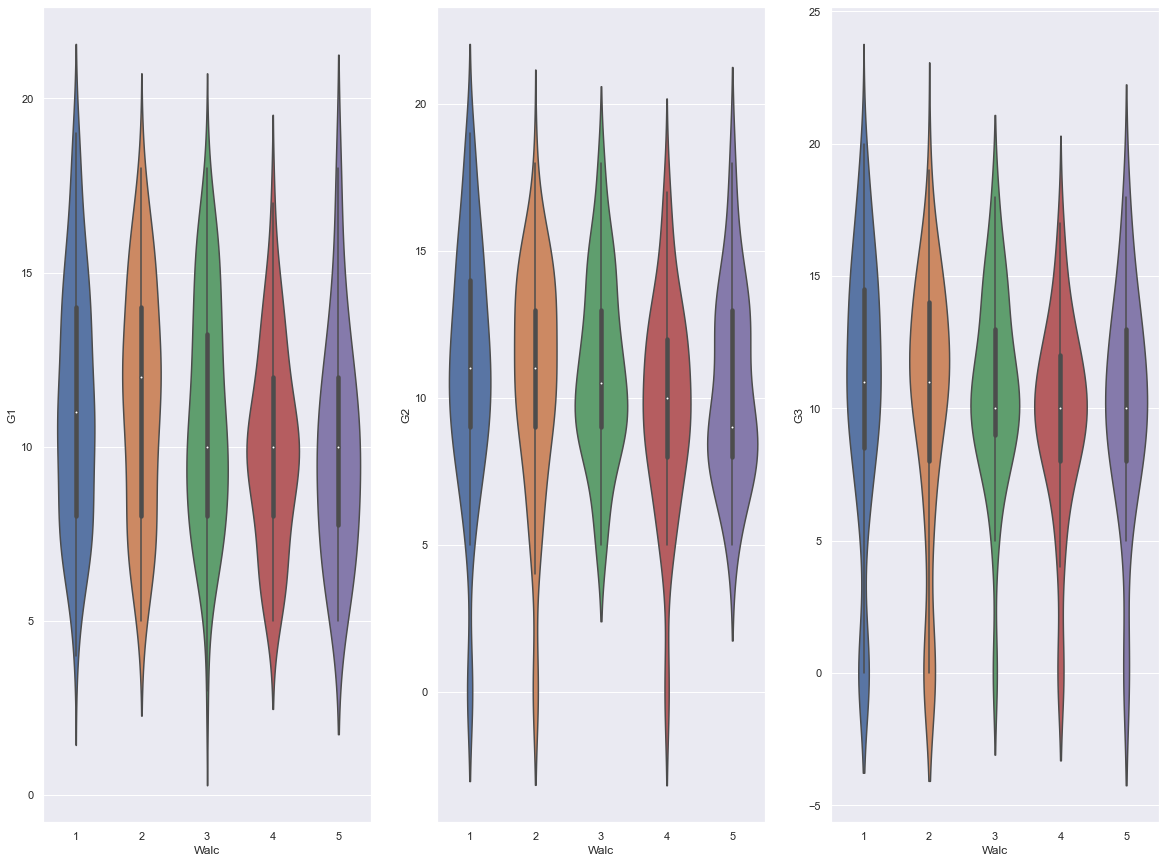

current health status:



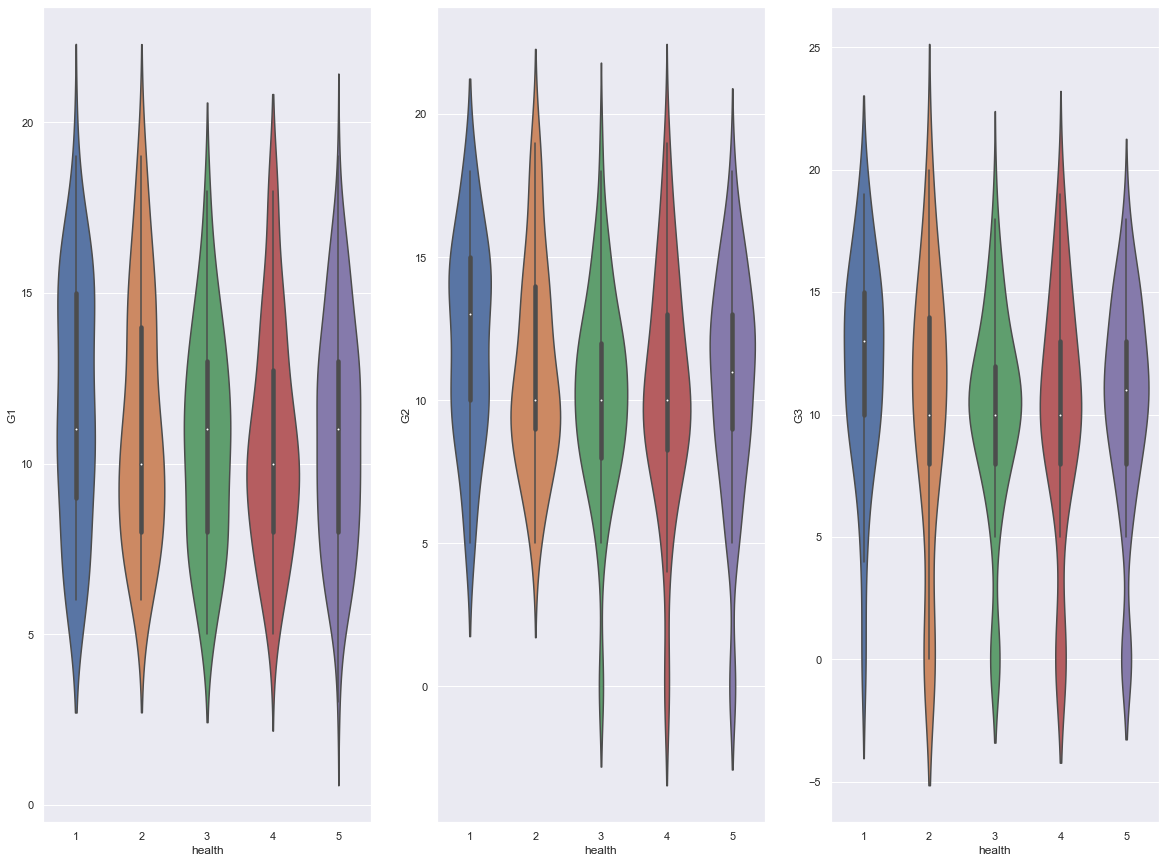

In [16]:
for feature in dataset.columns[:-4]:
    print("{}:\n".format(featuresNames[feature]))
    plt.figure(figsize=(20,15))
    sns.set_theme(style="darkgrid")
    plt.subplot(1,3,1)
    sns.violinplot(x = feature, y = 'G1', data = dataset)
    plt.subplot(1,3,2)
    sns.violinplot(x = feature, y = 'G2', data = dataset)
    plt.subplot(1,3,3)
    sns.violinplot(x = feature, y = 'G3', data = dataset)
    plt.show()

<b>QUICK AND 'NAIVE' CONCLUSIONS:</b><br>
    <b>student's school:</b> no big differences. Slightly better results for Gabriel Pereira.<br>
    <b>sex:</b> better results for men.<br>
    <b>age:</b> grades gradually decreasing with increasing age. We are not considering ages 21, 22 and 23 because there are 3, 1 and 1 student in those groups respectively<br>
    <b>home adress type:</b> students from urban areas tend to have better results. Quality of teaching might be better in bigger towns and cities.<br>
    <b>family size:</b> it seems that grades are slightly higher in smaller families.<br>
    <b>parent's cohabitation status:</b> if there is any difference, it is in grade spread width - children in families where parents are living apart get more very low and more very high grades at the same time.<br>
    <b>mother's education:</b> apart from the left-most case, where mother has no education (only 3 cases - not statistically representative) the general trend for students is to get higher grades with better educated mothers.<br>
    <b>father's education:</b> same as above (tere are 2 students whose father's have no education).<br>
    <b>mother's job:</b> children of health-workers get better results. This is reasonable as such families tend to be of higher social class.<br>
    <b>father's job:</b> teachers' children get better results (however there are only 20-30 examples for three groups, so results might be not reliable)<br>
    <b>reason to choose this school:</b> students motivated by school's reputation get clearly better grades. This is understandable as such motivation often idicate that student has ambition to get higher marks.<br>
    <b>student's guardian:</b> in our dataset students with a guardian other the their parents get lower results. This might suggest that parents are able to motivate better/are more solid in overseeing their own children. However, this group is the smallest (32 examples) and therefore might be not representative.<br>
    <b>home to school travel time:</b> There seems to be a slight tendency to get worse grades with increasing distance to school. This might be a result of less time for learining at home.<br>
    <b>weekly study time:</b> Quite predictable - more study time means better grades. However, this tendecy is slightly reversing between two last groups. This might be of course result of size of the last group (27 examples). Another possible reason - for talented students studying less (3 on our scale) might be enough to get very good grades, whereas ambitious but less talented one need to spend more time studying.<br>
    <b>number of past class failures:</b> Understandable trend - students who failed more classes have worse grades.<br>
    <b>extra educational support:</b> It seems clear that students with worse grades need more help. <br>
    <b>family educational support:</b> Very similiar results - no conlusions<br>
    <b>extra paid classes within the course subject:</b> Paid classes results in higher grades. Unlike  previous "educational support" here paid classes are probably taken mostly by ambitious students or students that can afford it - possibly meaning having higher social status.<br>
    <b>extra-curricular activities:</b> Slightly better grades amongst students having those activities might have a similar reason as described above.<br>
    <b>attended nursery school:</b> No clear conlusions.<br>
    <b>wants to take higher education:</b> Students wanting to take higher aducation get much higher grades. Quite self-explanatory<br>
    <b>Internet access at home:</b> Students that have internet acces get higher grades. Internet is obviously a very powerful tool for learning and using it might prove benefitial for students' results. Another reason might be that lack of home internet may indicate lower social class of a family.<br>
    <b>with a romantic relationship:</b> No clear conclusions.<br>
    <b>quality of family relationships:</b> No clear conlusions. The first group (graded "1") is not representative (8 examples).<br>
    <b>free time after school:</b> Some tendencies might be interpreted, but they seem to be quite random.<br>
    <b>going out with friends:</b> The tendency we can see is a little bit more complex - students going out hardly ever get lower grades, students going out rarely get considerably higher and then, the more students go out, the worse grades they get. It might indicate that keeping social- and "work-" life balance is important. Still, learning more results in higher grades.<br>
    <b>workday alcohol consumption:</b> No clear conclusions<br>
    <b>weekend alcohol consumption:</b> It seems that higher consumption results in lower grades, but the difference is negligible.<br>
    <b>current health status:</b> No clear conlusions.
    
    
    
    
    
    

<b>Now let us check how G3 depends on other grades.

<AxesSubplot:xlabel='G2', ylabel='G3'>

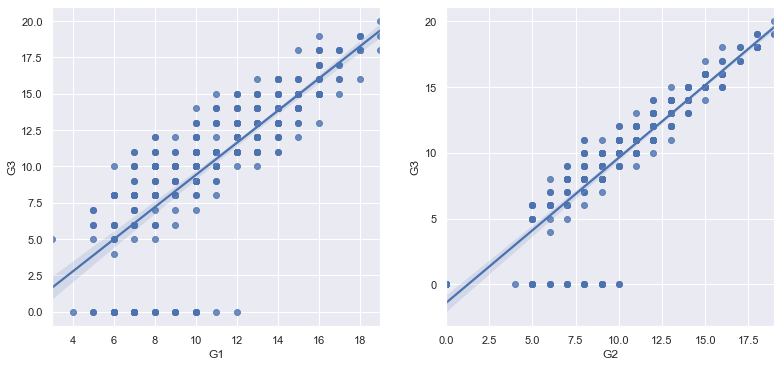

In [17]:
plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
sns.regplot(x='G1', y = 'G3', data=dataset)
plt.subplot(3,3,2)
sns.regplot(x='G2', y = 'G3', data=dataset)

It is quite clear that students' grades are repeatable. We can also see that students who were graded 0 in the third period had not got high grades previously (4-12 in G1, 4-10 in G2). Fact that these were not top-scoring students reinforces credibility of data. 

<h1>Data cleaning and preprocessing

There is no null-values (therefore no examples removal or value filling is needed) and features are mainly categorical or numerical with few unique values. Exceptions are "absences" and period grades. Considering period grades, the most 'uncertain' values are zero grades, but due following previous conlusions they will be left for now.<br>
Futhermore, correlation between features should be checked.<br>
Choosing optimal features for analysis will be performed after obtaining results without excluding any.

In [18]:
#Before proceeding with dataset modification let's keep the original one just in case.
dataset_original = dataset.copy()

<h3>Categorical values encoding</h3><br>
<b>Now all binary categorical features will be encoded.</b><br>
First we will replace "yes" and "no" values to make sure that "no" will be zeros and "yes" - ones.

In [19]:
dataset.replace("no", 0, inplace=True)
dataset.replace("yes", 1, inplace=True)
dataset.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

   reason guardian  traveltime  studytime  failures  schoolsup  famsup  paid  \
0  course   mother           2          2         0          1       0     0   
1  course   father           1          2         0          0       1     0   
2   other   mother           1          2         3          1       0     1   
3    home   mother           1          3         0          0       1     1   
4    home   father           1          2         0          0       1     1   

   activities  nursery  higher  internet  romantic  famrel  freetime  goout  \
0           0        1       1         0         0       4         3      4   
1           0        0       1         1         0       5         3      3   
2           0        1       1         1         0       4         3      2   
3           1        1       1         1         1       3         2      2   
4           0        1       1         0         0       4         3      2   

   Dalc  Walc  health  absences  G1  G2  G3  
0     1     1       3         6   5   6   6  
1     1     1       3         4   5   5   6  
2     2     3       3        10   7   8  10  
3     1     1       5         2  15  14  15  
4     1     2       5         4   6  10  10

<b>Now that "yes"/"no" values are encoded, let us get to the other binary categorical features.</b><br>
We could use replace method again, but for the sake of automation LabelEncoder will be implemented.

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
#Actualize categorical features list ("yes"/"no" was removed.)
categorical = (dataset.dtypes == "object")
categorical_lst = []
for i in categorical[categorical].index:
    categorical_lst.append(i)
categorical_lst

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian']

In [22]:
for f in categorical_lst:
    if len(dataset[f].unique()) == 2:
        le.fit(dataset[f].unique())
        dataset[f]=le.transform(dataset[f])
dataset.head()

school  sex  age  address  famsize  Pstatus  Medu  Fedu     Mjob      Fjob  \
0       0    0   18        1        0        0     4     4  at_home   teacher   
1       0    0   17        1        0        1     1     1  at_home     other   
2       0    0   15        1        1        1     1     1  at_home     other   
3       0    0   15        1        0        1     4     2   health  services   
4       0    0   16        1        0        1     3     3    other     other   

   reason guardian  traveltime  studytime  failures  schoolsup  famsup  paid  \
0  course   mother           2          2         0          1       0     0   
1  course   father           1          2         0          0       1     0   
2   other   mother           1          2         3          1       0     1   
3    home   mother           1          3         0          0       1     1   
4    home   father           1          2         0          0       1     1   

   activities  nursery  higher  internet  romantic  famrel  freetime  goout  \
0           0        1       1         0         0       4         3      4   
1           0        0       1         1         0       5         3      3   
2           0        1       1         1         0       4         3      2   
3           1        1       1         1         1       3         2      2   
4           0        1       1         0         0       4         3      2   

   Dalc  Walc  health  absences  G1  G2  G3  
0     1     1       3         6   5   6   6  
1     1     1       3         4   5   5   6  
2     2     3       3        10   7   8  10  
3     1     1       5         2  15  14  15  
4     1     2       5         4   6  10  10

<b>Binary categorical features are dealt with. Now it is time for non-binary ones.</b><br>
Just a reminder, the reason for splitting it is that I want to one-hot encode features that have more than two unique values, as the are not ordinal. 

In [23]:
#Once again actualize categorical features list (this would be more helpful with large number of features).
categorical = (dataset.dtypes == "object")
categorical_lst = []
for i in categorical[categorical].index:
    categorical_lst.append(i)

In [24]:
for f in categorical_lst:
    #For each feature we add dummies to our dataset. 
    dataset = pd.concat([dataset,pd.get_dummies(dataset[f], prefix="{}_is".format(f))], axis=1)
    #We drop the original categorical feature.
    dataset.drop(f, axis=1, inplace=True)
    #We remove one of created dummy features to avoid redundancy.
    dataset = dataset.iloc[: , :-1]

In [25]:
dataset.head()

school  sex  age  address  famsize  Pstatus  Medu  Fedu  traveltime  \
0       0    0   18        1        0        0     4     4           2   
1       0    0   17        1        0        1     1     1           1   
2       0    0   15        1        1        1     1     1           1   
3       0    0   15        1        0        1     4     2           1   
4       0    0   16        1        0        1     3     3           1   

   studytime  failures  schoolsup  famsup  paid  activities  nursery  higher  \
0          2         0          1       0     0           0        1       1   
1          2         0          0       1     0           0        0       1   
2          2         3          1       0     1           0        1       1   
3          3         0          0       1     1           1        1       1   
4          2         0          0       1     1           0        1       1   

   internet  romantic  famrel  ...  Dalc  Walc  health  absences  G1  G2  G3  \
0         0         0       4  ...     1     1       3         6   5   6   6   
1         1         0       5  ...     1     1       3         4   5   5   6   
2         1         0       4  ...     2     3       3        10   7   8  10   
3         1         1       3  ...     1     1       5         2  15  14  15   
4         0         0       4  ...     1     2       5         4   6  10  10   

   Mjob_is_at_home  Mjob_is_health  Mjob_is_other  Mjob_is_services  \
0                1               0              0                 0   
1                1               0              0                 0   
2                1               0              0                 0   
3                0               1              0                 0   
4                0               0              1                 0   

   Fjob_is_at_home  Fjob_is_health  Fjob_is_other  Fjob_is_services  \
0                0               0              0                 0   
1                0               0              1                 0   
2                0               0              1                 0   
3                0               0              0                 1   
4                0               0              1                 0   

   reason_is_course  reason_is_home  reason_is_other  guardian_is_father  \
0                 1               0                0                   0   
1                 1               0                0                   1   
2                 0               0                1                   0   
3                 0               1                0                   0   
4                 0               1                0                   1   

   guardian_is_mother  
0                   1  
1                   0  
2                   1  
3                   1  
4                   0  

[5 rows x 42 columns]

<b>Now that all categorial features are encoded, let us move grades to the end of dataframe just for cosmetics.

In [26]:
dataset=dataset[[f for f in dataset if f not in ["G1", "G2", "G3"]]+["G1", "G2", "G3"]]
dataset.head()

school  sex  age  address  famsize  Pstatus  Medu  Fedu  traveltime  \
0       0    0   18        1        0        0     4     4           2   
1       0    0   17        1        0        1     1     1           1   
2       0    0   15        1        1        1     1     1           1   
3       0    0   15        1        0        1     4     2           1   
4       0    0   16        1        0        1     3     3           1   

   studytime  failures  schoolsup  famsup  paid  activities  nursery  higher  \
0          2         0          1       0     0           0        1       1   
1          2         0          0       1     0           0        0       1   
2          2         3          1       0     1           0        1       1   
3          3         0          0       1     1           1        1       1   
4          2         0          0       1     1           0        1       1   

   internet  romantic  famrel  ...  Dalc  Walc  health  absences  \
0         0         0       4  ...     1     1       3         6   
1         1         0       5  ...     1     1       3         4   
2         1         0       4  ...     2     3       3        10   
3         1         1       3  ...     1     1       5         2   
4         0         0       4  ...     1     2       5         4   

   Mjob_is_at_home  Mjob_is_health  Mjob_is_other  Mjob_is_services  \
0                1               0              0                 0   
1                1               0              0                 0   
2                1               0              0                 0   
3                0               1              0                 0   
4                0               0              1                 0   

   Fjob_is_at_home  Fjob_is_health  Fjob_is_other  Fjob_is_services  \
0                0               0              0                 0   
1                0               0              1                 0   
2                0               0              1                 0   
3                0               0              0                 1   
4                0               0              1                 0   

   reason_is_course  reason_is_home  reason_is_other  guardian_is_father  \
0                 1               0                0                   0   
1                 1               0                0                   1   
2                 0               0                1                   0   
3                 0               1                0                   0   
4                 0               1                0                   1   

   guardian_is_mother  G1  G2  G3  
0                   1   5   6   6  
1                   0   5   5   6  
2                   1   7   8  10  
3                   1  15  14  15  
4                   0   6  10  10  

[5 rows x 42 columns]

<h3>Outliers removal</h3><br>
There is no reason to remove outliers in the dataset. For absences several values are strangely high but still seem to be valid and I do not have a reason to remove them just for being out of "regular" range. Doing this might result in losing precious data.<br>
For other features, apart from period grades, the above applies as well. Moreover, in most cases, deleting outliers would result in losing the whole category, which is unaccaptable.<br>
We cannot treat zero grades in period grades features as values viable for removal. These zero values seem to be rightly collected and therefore cannot be removed.

<h3>Skewness removal</h3><br>
<i>Conlusions below are based on a surce literature (https://www.journals.uchicago.edu/doi/10.1086/701235)</i><br>
Amongst all features, the only ones with possibly harmful for predicitions skewness are absences, G2 and G3 (the latter two because of relatively high amount of zero values, not fitting in normal distribution of values).<br>
In every of these 3 cases there is a considerable number of zero values, and nonnegative skewed variables cannot be transformed (e.g. with logarithm) to better approach normal distribution. I decided to take two aproaches to this situation:<br>
- Absences values will be left as it is and its skewness will be taken into consideration while choosing a model later.<br>
-<b> New feature will be added to G2 and G3. This binary feature will indicate if G2 or G3 value is 0 or not. The task later will be to predict if a student has zero grade and if not - how high did he score. Model for predicting how high the grade is will not be trained on examples with zero grade and therefore skewness is eliminated. Predicting zero grades will be a separate classification problem.

In [27]:
#Adding two columns with 0 value if G2/G3 is 0 and 1 value if else.
dataset["G2_zero"]=(dataset["G2"]!=0)
dataset["G3_zero"]=(dataset["G3"]!=0)
dataset.replace(False, 0, inplace=True)
dataset.replace(True, 1, inplace=True)

<h3>Heatmaps</h3><br>
<b>In the next step I want to explore data correlation and visualize it with heatmaps.</b><br>
I will take two approaches:<br>
- For originally categorical functions I will use Cramer's V to measure correlation (appropiate for categorical, not ordinal data)<br>
<i>Code for counting Cramer's V is taken from https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9</i><br>
- For numerical features Spearman rank correlation will be used. It is because those values are ordinal.

In [28]:
import scipy.stats as ss
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [29]:
categorical_org = (dataset_original.dtypes == "object")
categorical_org_lst = []
for i in categorical_org[categorical_org].index:
    categorical_org_lst.append(i)
#I will use categorical_lst from dummies encoding step to remove old feature names from the list I am currently creating.
for f in categorical_lst:
    categorical_org_lst.remove(f)
#Now I will append new dummie features (names copied from the dataset.head - this may by automated)
nonordinal_lst = categorical_org_lst + ["Mjob_is_at_home","Mjob_is_health","Mjob_is_other","Mjob_is_services",
                                             "Fjob_is_at_home","Fjob_is_health","Fjob_is_other","Fjob_is_services",
                                             "reason_is_course","reason_is_home","reason_is_other","guardian_is_father",
                                             "guardian_is_mother", "G2_zero", "G3_zero"]

<AxesSubplot:>

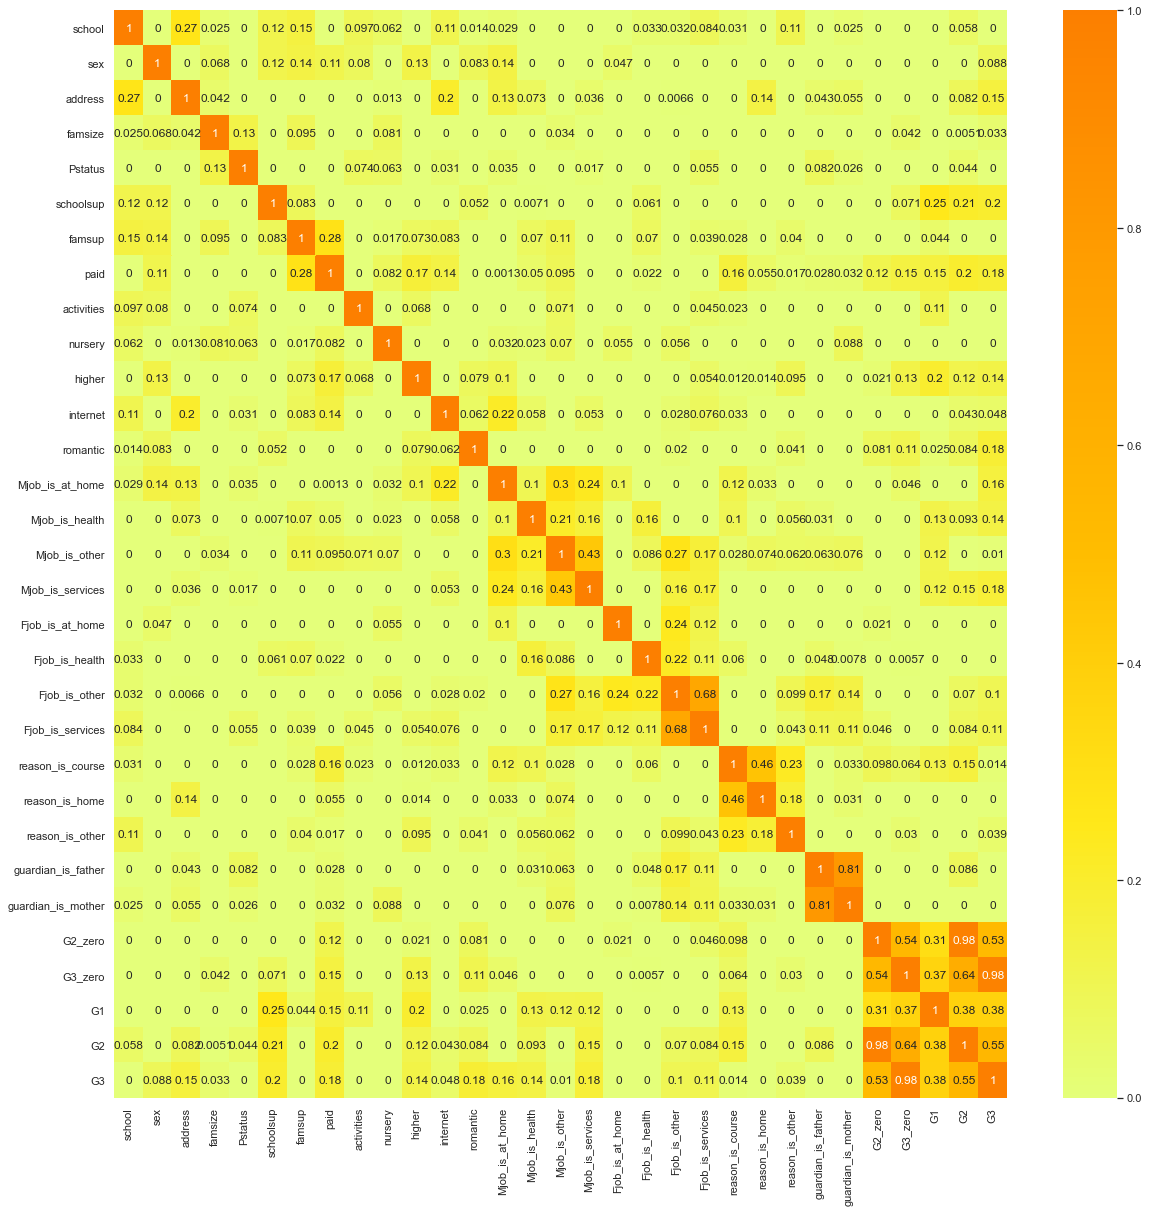

In [30]:
#Making correlation heatmap for chosen features and period grades
plt.figure(figsize=(20,20))
cramV = dataset[nonordinal_lst+["G1","G2","G3"]].corr(cramers_v)
sns.heatmap(cramV, cmap = "Wistia", annot= True)

<b>In the heatmap above period grades were included, but the heatmap mainly is for understanding correlation between other features. For showing correlation between old categorical features and period grades better i will use correlation ratio.<br></b>
<i>Code for correlation_ratio once again is taken from https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9</i><br>

In [31]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

<AxesSubplot:>

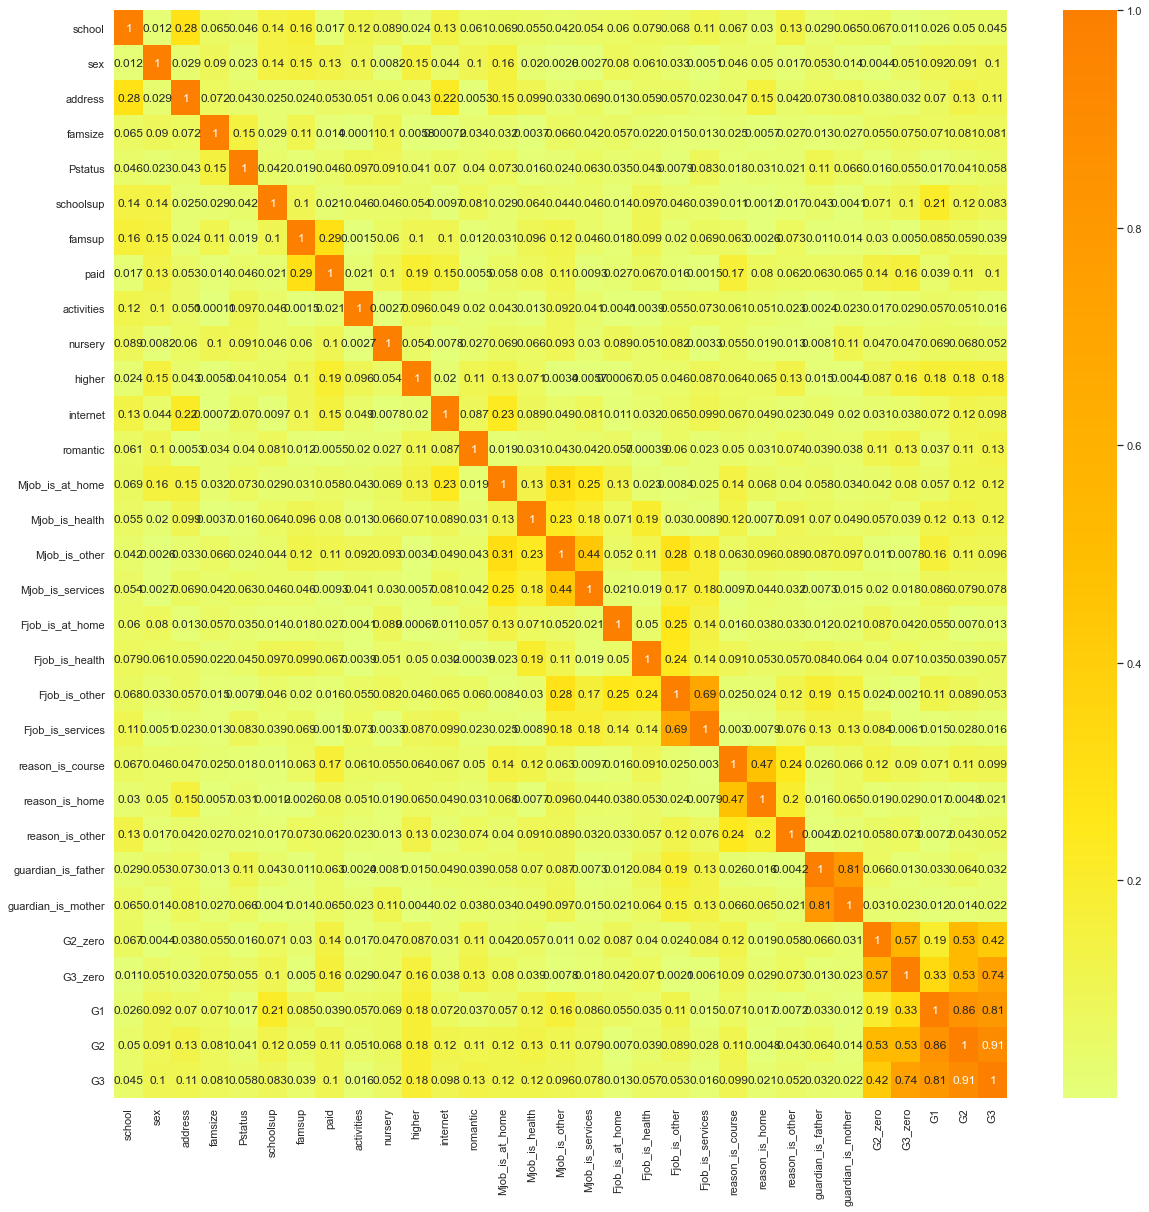

In [32]:
#Making correlation heatmap for chosen features and period grades
plt.figure(figsize=(20,20))
corrRat = dataset[nonordinal_lst+["G1","G2","G3"]].corr(correlation_ratio)
sns.heatmap(corrRat, cmap = "Wistia", annot= True)

<b>The overall conlusion from heatmaps above is that features are not strongly correlated.</b> The highest scores are for period grades correlation (which we did not intend to explore here), dummy features stemming from the same original feature (logical; correlations are not too big).<br>
Apart from that, several low scores might indicate interesting conclusions:</br>
- School support is correlated more strongly with G1 than G2 or G3. This might mean that students with weak first period grades were supported and then their grades improved.<br>
- Moreover we can see that there is some kind of relationship between address and school choice or internet access at home. This might be explained by location of schools (in more rural/urban areas) and internet availability for families living in rural areas.<br>
- It also seems that students aiming for higher education are more likely to attend to paid classes, what sounds rational as well.

<b>Now let us visualize the rest of features using Spearman rank correlation

<AxesSubplot:>

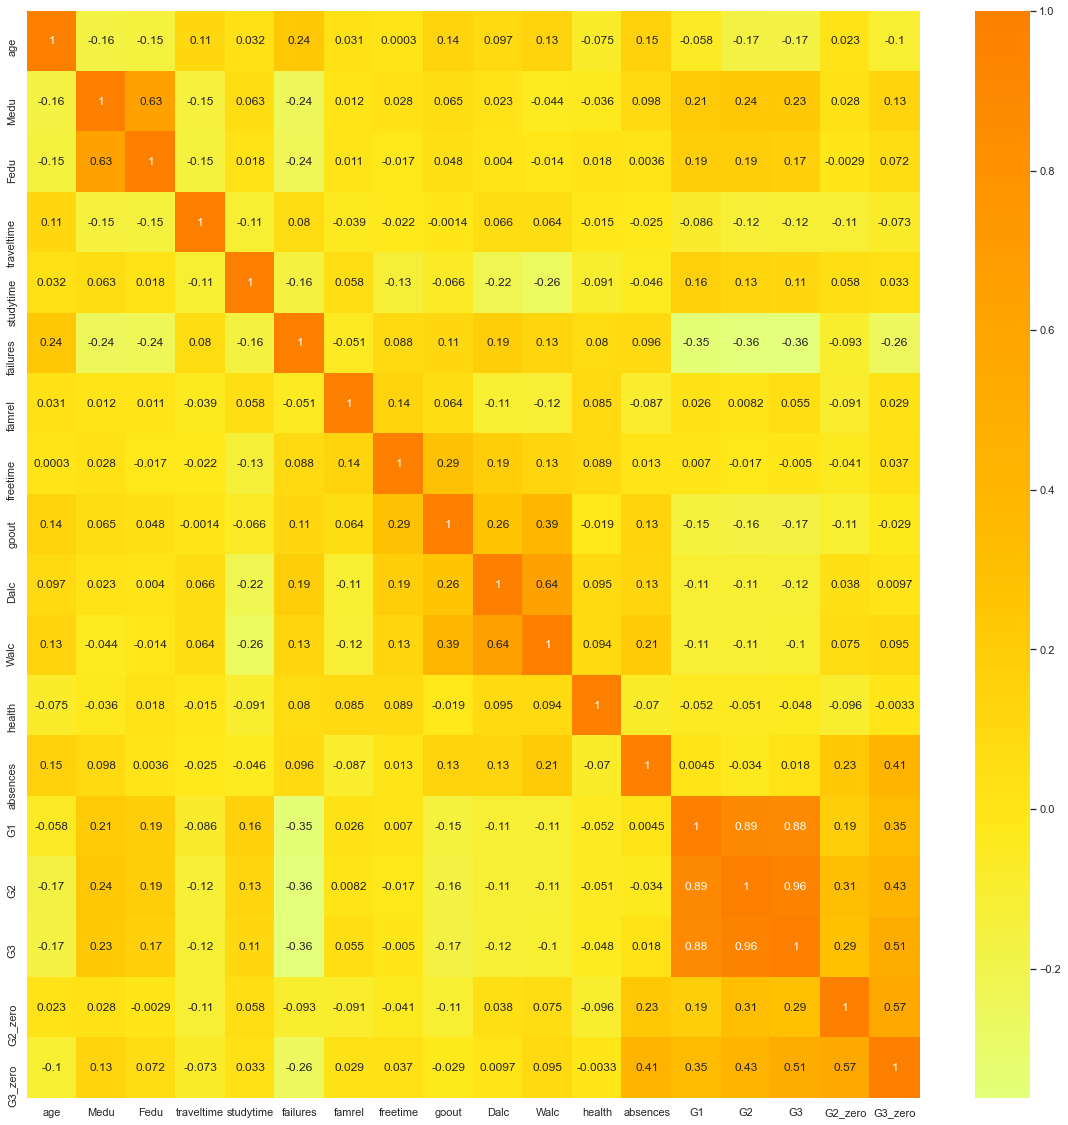

In [33]:
#Making correlation heatmap for ordinal features and period grades (all are stored in numerical_lst)
plt.figure(figsize=(20,20))
corr = dataset[numerical_lst+["G2_zero", "G3_zero"]].corr(method='spearman')
sns.heatmap(corr, cmap = "Wistia", annot= True)

Several strong or relatively strong correlations might be noticed:<br>
- <b>Students with more absences were more likely to get zero period grades</b><br>
- Parents tend to match according to their education.<br>
- Failures decrease the chance of getting good grades.<br>
- Workday drinkers drink more on weekend as well, and students going out with friends more, drink more particularly durig weekends.<br>
- Weekend drinkers are more probable to skip classes.<br>
- Workday drinkers fail more frequently.<br>
- The older the student is, the bigger the chance of failing (or having already failed).<br>
    
We can also see very strong correlation between period grades. Because of its strength validity of including them into modeling should be considered.

<h1>Splitting into train and test sets</h1><br>
I decided not to use period grades (G1 and G2) in this task (predicting G3). I want to check how close results can we get fro training model on non-grade data.


Now I will create two datasets - one for predicting how high grade a student got (with "G3_zero" removed) and classifying if a student scored 0 (with "G3" removed). I will also downsample the latter to prevent data imbalance (zero grades count only for about 10% of all examples).

<h3>Data Downsampling

In [34]:
dataset_ones = dataset[dataset["G3_zero"]==1]
dataset_zeros = dataset[dataset["G3_zero"]==0]
#frac is chosen this low to get "ones" examples group three times bigger than "zero" examples group
dataset_ones_downsampled = dataset_ones.sample(frac=0.32)
dataset_downsampled = pd.concat([dataset_ones_downsampled,dataset_zeros])

In [35]:
y_grade = dataset['G3'].copy()
X_grade = dataset.drop(columns=["G1","G2","G3","G2_zero","G3_zero"]).copy()
y_zero = dataset_downsampled['G3_zero'].copy()
X_zero = dataset_downsampled.drop(columns=["G1","G2","G3","G2_zero","G3_zero"]).copy()

I will split data into two sets (train and test sets). For "zero dataset" with unusual examples number ratio (0.9 : 0.1). This is because of small numbers of number of examples in general. Maximizing training test will boost the chance to train model sufficiently.<br><br>
I will also use "stratify" parameter to ensure that the amount of zero grades in the test set will be proportional do the training set.

In [36]:
X_train_grade, X_test_grade, y_train_grade, y_test_grade = train_test_split(X_grade, y_grade, test_size=0.2, train_size=0.8, random_state=0, stratify = dataset["G3_zero"])
X_train_zero, X_test_zero, y_train_zero, y_test_zero = train_test_split(X_zero, y_zero, test_size=0.1, train_size=0.9, random_state=0, stratify = y_zero)
print(y_test_zero.value_counts())

1.0    12
0.0     4
Name: G3_zero, dtype: int64


It can be seen above that there are four examples with zero grades it the test set what it approximately 10% of all such examples in whole dataset.

In [37]:
print(X_train_grade.shape, y_train_grade.shape)
print(X_test_grade.shape, y_test_grade.shape)
print(X_train_zero.shape, y_train_zero.shape)
print(X_test_zero.shape, y_test_zero.shape)

(316, 39) (316,)
(79, 39) (79,)
(136, 39) (136,)
(16, 39) (16,)


Now that these sets are divided let us modify them further for the needs of our case:<br>
- all y sets need to be divided into 2 columns to enable checking zero-classification and grade height predicition separately (new sets will be created)<br>
- in training set rows with zero grades should be excluded from training prediction model.<br>
- test sets should be left intact<br>

Before that let us normalize and standarize data.

<b>Data normalization and standarization. Let us normalize data before we proceed with splitting dataset</b><br><br>

I will not use standarization as variables do not have gaussian distribution and many of them are binary (zero-one).<br><br>

First I will fit scalers on unmodified data, then remove zero-values from train_grade sets (while they are still dataframes) and then transform datasets using fitted scalers.

In [38]:
from sklearn.preprocessing import MinMaxScaler
MinMaxX = MinMaxScaler()
MinMaxY = MinMaxScaler()
X_colnames = list(X_train_grade)
MinMaxX.fit(X_train_grade[X_colnames])
MinMaxY.fit(np.array(y_train_grade).reshape(-1,1))

MinMaxScaler()

Now let us get back to dividing/modifying sets. The aim is to have to "separate" train datasets - for grade prediction (without zero-grade examples and G3 labels) and for zero grade classification (with all examples and with G3_zero labels).

In [39]:
X_train_grade = X_train_grade.loc[y_train_grade!=0]
y_train_grade = y_train_grade.loc[y_train_grade!=0]

In [40]:
#I am going to disable warnings popping up while scaling
pd.options.mode.chained_assignment = None

X_train_grade[X_colnames] = MinMaxX.transform(X_train_grade[X_colnames])
X_test_grade[X_colnames] = MinMaxX.transform(X_test_grade[X_colnames])
X_train_zero[X_colnames] = MinMaxX.transform(X_train_zero[X_colnames])
X_test_zero[X_colnames] = MinMaxX.transform(X_test_zero[X_colnames])

#Note that features with only zero-one values remain the same after normalization.
y_train_grade = MinMaxY.transform(np.array(y_train_grade).reshape(-1,1))
y_test_grade = MinMaxY.transform(np.array(y_test_grade).reshape(-1,1))
#I do not normalize "zero" target feature, because it consists of ones and zeros.

In [41]:
print(X_train_grade.shape, y_train_grade.shape)

(286, 39) (286, 1)


<b>Now our training sets are X_train_grade, y_train_grade for predicting grade height and X_train_zero, y_train_zero for classification if a student scored 0 (test sets are named by analogy).

<h1>Model fitting - zero-grade classification

Alghoritms to use for classification:<br>
- logistic regression<br>
- Naive-Bayes<br>
- Random forest classifier <br>
- Gradient boosting classifier<br><br>
In this section I will try classification with algorithms listed above. After some parameter tuning i should be able to choose the best one, basing on cross-validation balanced accuracy score (not regular accuracy, because there is a lot less zer-grade cases) and confusion matrix created from predicitons and test set.

<b>First I will try to use logistic regression.

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import statistics

First just a quick iteration through several algorithms with default settings to decide which on is worth tuning.<br>
<i>There is a lot of model training in this task, so this will help speed up acquiring good enough results.

In [43]:
for model in [LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier(), GaussianNB(), BernoulliNB(), KNeighborsClassifier(), SVC()]:
    print("{} results:".format(model))
    scores = cross_val_score(estimator=model, X=X_train_zero, y=y_train_zero, scoring='balanced_accuracy', cv=4)
    print("cross validation scores: {}\ncross validation mean score: {}".format(scores, statistics.mean(scores)))
    model.fit(X_train_zero, y_train_zero)
    #Predict y values for the test set
    y_pred_zero = model.predict(X_test_zero)
    print("Confusion matrix:\n{}\n\n".format(confusion_matrix(y_test_zero,y_pred_zero)))

LogisticRegression() results:
cross validation scores: [0.52403846 0.60576923 0.56666667 0.61111111]
cross validation mean score: 0.5768963675213675
Confusion matrix:
[[ 1  3]
 [ 1 11]]


RandomForestClassifier() results:
cross validation scores: [0.73076923 0.625      0.70222222 0.70222222]
cross validation mean score: 0.6900534188034189
Confusion matrix:
[[ 3  1]
 [ 0 12]]


GradientBoostingClassifier() results:
cross validation scores: [0.75480769 0.85576923 0.81333333 0.92      ]
cross validation mean score: 0.8359775641025641
Confusion matrix:
[[ 4  0]
 [ 0 12]]


GaussianNB() results:
cross validation scores: [0.79807692 0.92307692 0.96       0.67333333]
cross validation mean score: 0.8386217948717949
Confusion matrix:
[[ 4  0]
 [ 2 10]]


BernoulliNB() results:
cross validation scores: [0.79807692 0.8125     0.79333333 0.73777778]
cross validation mean score: 0.7854220085470086
Confusion matrix:
[[ 3  1]
 [ 0 12]]


KNeighborsClassifier() results:
cross validation scores: [0.543

<b>As we can see above, Gaussian Naive Bayes gives the best results so I will focus on it. Additionally I will ry using Random Forests, as they in theory should apply well to this case and gave less false positives (and because of bigger amount of actual postives in test set for grade prediciton, this will be even more important).<br><br></b>
 Time for hyperparameters tuning.

In [44]:
from sklearn.model_selection import GridSearchCV
model_NB = GaussianNB()

parameter_candidates_NB = {'var_smoothing': np.logspace(0,-9, num=1000)}
grid_search_NB = GridSearchCV(estimator=model_NB, 
                 param_grid=parameter_candidates_NB, 
                 cv=3, 
                 scoring='balanced_accuracy') 
grid_search_NB.fit(X_train_zero, y_train_zero)

print('Best var_smoothing', grid_search_NB.best_params_)
print('Best score:',grid_search_NB.best_score_) 
y_pred_zero_NB = grid_search_NB.predict(X_test_zero)
print("{}:\n{}".format(model_NB, confusion_matrix(y_test_zero,y_pred_zero_NB)))

Best var_smoothing {'var_smoothing': 3.7720424934170016e-05}
Best score: 0.8483363042186571
GaussianNB():
[[ 4  0]
 [ 2 10]]


The mean score did not improve.

In [45]:
model_forest = RandomForestClassifier()
parameter_candidates_forest = [{'n_estimators' : [int(x) for x in np.linspace(start = 200, stop = 1000, num = 4)],
                                'max_depth': [int(x) for x in np.linspace(10, 100, num = 4)],
                                'min_samples_split': [2, 5],
                                'min_samples_leaf': [1, 2],
                                'bootstrap': [True, False]                                
                               }]
grid_search_forest = GridSearchCV(estimator=model_forest, param_grid=parameter_candidates_forest, scoring='balanced_accuracy', n_jobs=-1, cv=4)
grid_search_forest.fit(X_train_zero, y_train_zero)   

print('Best score:',grid_search_forest.best_score_) 

#Predict y values for the test set
y_pred_zero_forest = grid_search_forest.predict(X_test_zero)
confusion_matrix(y_test_zero,y_pred_zero_forest)

Best score: 0.7753311965811966


array([[ 4,  0],
       [ 0, 12]], dtype=int64)

<h3>Removing predicted zero grades for y_test_grade dataset</h3><br>
Because I do not want to predict how high scored a student who I predict to score zero.

In [46]:
y_pred_grade_zero = grid_search_NB.predict(X_test_grade)
y_pred_grade_zero = y_pred_grade_zero.reshape(-1, 1)
y_zero_results = np.concatenate((y_test_grade, y_pred_grade_zero), axis=1)
y_zero_results = pd.DataFrame(y_zero_results, columns=["G3", "G3_zero_pred"])
print(y_zero_results[(y_zero_results["G3"]==0) | (y_zero_results["G3_zero_pred"]==0)])
print(y_zero_results["G3"].value_counts())
print(y_zero_results["G3_zero_pred"].value_counts())

          G3  G3_zero_pred
7   0.631579           0.0
9   0.000000           0.0
15  0.631579           0.0
20  0.842105           0.0
21  0.000000           0.0
25  0.000000           0.0
29  0.000000           0.0
31  0.631579           0.0
36  0.421053           0.0
49  0.421053           0.0
52  0.473684           0.0
58  0.473684           0.0
59  0.789474           0.0
61  0.789474           0.0
62  0.894737           0.0
63  0.000000           0.0
68  0.000000           0.0
70  0.000000           0.0
72  0.000000           0.0
78  0.526316           0.0
0.526316    12
0.578947    10
0.631579     8
0.789474     8
0.000000     8
0.684211     6
0.473684     6
0.842105     5
0.947368     4
0.315789     4
0.736842     3
0.894737     2
0.421053     2
1.052632     1
Name: G3, dtype: int64
1.0    59
0.0    20
Name: G3_zero_pred, dtype: int64


It can be seen above that model managed to "find" all (8) actual zero grades, but at the same time idicated a lot (15) false zero grades (with 56 good predicitions). This is a worse result than I got with training and evaluating using "zero" datasets.<br><br>
However, considering that my assumed priority was to not give any score to students who got 0 grade, it might still be acceptable. Let us see what results I will get with Random Forest model.

In [47]:
y_pred_grade_zero = grid_search_forest.predict(X_test_grade)
y_pred_grade_zero = y_pred_grade_zero.reshape(-1, 1)
y_zero_results = np.concatenate((y_test_grade, y_pred_grade_zero), axis=1)
y_zero_results = pd.DataFrame(y_zero_results, columns=["G3", "G3_zero_pred"])
print(y_zero_results[(y_zero_results["G3"]==0) | (y_zero_results["G3_zero_pred"]==0)])
print(y_zero_results["G3"].value_counts())
print(y_zero_results["G3_zero_pred"].value_counts())

          G3  G3_zero_pred
9   0.000000           0.0
21  0.000000           0.0
25  0.000000           0.0
29  0.000000           0.0
36  0.421053           0.0
52  0.473684           0.0
59  0.789474           0.0
63  0.000000           0.0
68  0.000000           0.0
70  0.000000           0.0
72  0.000000           0.0
0.526316    12
0.578947    10
0.631579     8
0.789474     8
0.000000     8
0.684211     6
0.473684     6
0.842105     5
0.947368     4
0.315789     4
0.736842     3
0.894737     2
0.421053     2
1.052632     1
Name: G3, dtype: int64
1.0    68
0.0    11
Name: G3_zero_pred, dtype: int64


<b>The results are much better (9 less false negatives). I will still stick to this model further.

In [48]:
pd.set_option('display.max_rows', 80)

In [49]:
#y_pred_grade_zero - vertical 1D array on 1/0 predicted values
#X_test_grade - dataframe with test examples for grade prediciton
#X_test_grade_with_zeros = 
#X_test_grade['G3_zero_pred'] = y_pred_grade_zero.tolist()
#X_test_grade
y_pred_grade_zero_df = pd.DataFrame(y_pred_grade_zero, columns=["G3_zero_pred"], index=X_test_grade.index)
X_test_grade_with_zeros = pd.concat([X_test_grade, y_pred_grade_zero_df], axis=1)
X_test_grade_with_zeros = X_test_grade_with_zeros[X_test_grade_with_zeros["G3_zero_pred"]!=0]
X_test_grade=X_test_grade_with_zeros.drop(columns="G3_zero_pred")

In [50]:
y_zero_results = y_zero_results[y_zero_results["G3_zero_pred"]!=0]
y_test_grade = np.array(y_zero_results["G3"])

<h1>Model fitting - grade prediction

In [51]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor

In [52]:
y_test_grade_descaled = MinMaxY.inverse_transform(y_test_grade.reshape(-1, 1))
for model in [LinearRegression(), DecisionTreeRegressor(), KNeighborsRegressor(), Lasso(), RandomForestRegressor(), SVR(), MLPRegressor()]:
    model.fit(X_train_grade, y_train_grade)
    y_pred_grade = model.predict(X_test_grade)
    #Now I have to invert scaling to check the results.
    y_pred_grade_descaled = MinMaxY.inverse_transform(y_pred_grade.reshape(-1, 1))
    print("{} r2 score: {}\n".format(model, r2_score(y_test_grade_descaled, y_pred_grade_descaled)))
    print("{} mean squared error: {}\n".format(model, mean_squared_error(y_test_grade_descaled, y_pred_grade_descaled)))

LinearRegression() r2 score: 0.11268102133384617

LinearRegression() mean squared error: 8.837113669016805

DecisionTreeRegressor() r2 score: -1.223747068531226

DecisionTreeRegressor() mean squared error: 22.147058823529413

KNeighborsRegressor() r2 score: 0.12928341874402827

KNeighborsRegressor() mean squared error: 8.671764705882353

Lasso() r2 score: -0.08279437579183235

Lasso() mean squared error: 10.7839201111517



<ipython-input-52-5fee565f9a30>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_grade, y_train_grade)


RandomForestRegressor() r2 score: -0.013417797272648135

RandomForestRegressor() mean squared error: 10.092974999999997

SVR() r2 score: -0.026181610898761587

SVR() mean squared error: 10.220094192281522



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPRegressor() r2 score: -0.4891888388415473

MLPRegressor() mean squared error: 14.831341783376065



<b>Let us focus on KNN Regressor then.

In [53]:
model_KNR = KNeighborsRegressor()

parameter_candidates_KNR = {"n_neighbors": range(1, 100),
                           "weights": ["uniform", "distance"],
                           "metric": ["euclidean", "manhattan", "minkowski"]}
grid_search_KNR = GridSearchCV(estimator=model_KNR, 
                 param_grid=parameter_candidates_KNR, 
                 cv=4, 
                 scoring='neg_mean_squared_error') 
grid_search_KNR.fit(X_train_grade, y_train_grade)
print('Best score:',grid_search_KNR.best_score_) 

Best score: -0.02593551007013148


In [54]:
print('Best parameters', grid_search_KNR.best_params_)
y_pred_grade_KNR = grid_search_KNR.predict(X_test_grade)
y_pred_grade_KNR_descaled = MinMaxY.inverse_transform(y_pred_grade_KNR.reshape(-1, 1))

Best parameters {'metric': 'manhattan', 'n_neighbors': 25, 'weights': 'distance'}


In [55]:
print("{} r2 score: {}\n".format(model_KNR, r2_score(y_test_grade_descaled, y_pred_grade_KNR_descaled)))
print("{} mean squared error: {}\n".format(model_KNR, mean_squared_error(y_test_grade_descaled, y_pred_grade_KNR_descaled)))

KNeighborsRegressor() r2 score: 0.07746957612731664

KNeighborsRegressor() mean squared error: 9.187796513880798



<b>Let us compare predictions and actual values

In [56]:
y_results_grade = pd.DataFrame(np.concatenate((y_test_grade_descaled, y_pred_grade_KNR_descaled), axis=1), columns = ["G3", "G3_pred"])
y_results_grade.sort_values("G3", ascending=False, inplace=True)

<AxesSubplot:ylabel='G3_pred'>

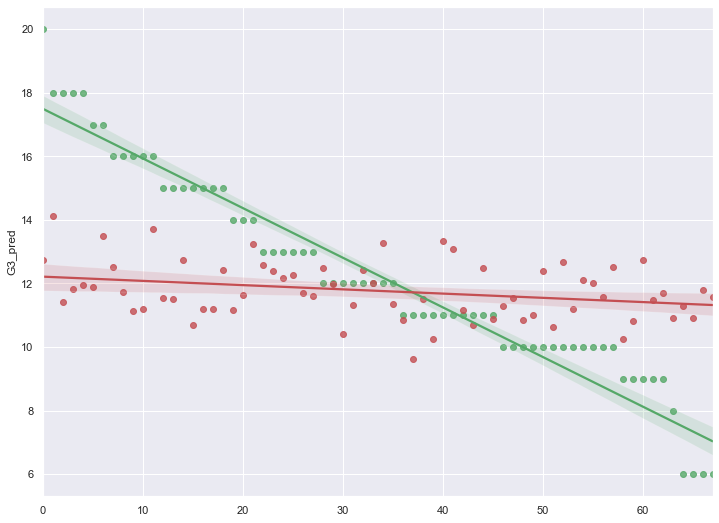

In [57]:
plt.figure(figsize=(12,9))
sns.regplot(x=[i for i in range(0,len(y_results_grade.index))], y=y_results_grade["G3"], color="g")
sns.regplot(x=[i for i in range(0,len(y_results_grade.index))], y=y_results_grade["G3_pred"], color="r")

<b>It can be seen that predictions are very poor. Let us check if linear regression will work better in this case.

Best score: -0.02533788914831818
LinearRegression() r2 score: 0.11268102133384617

LinearRegression() mean squared error: 8.837113669016805



<AxesSubplot:ylabel='G3_pred'>

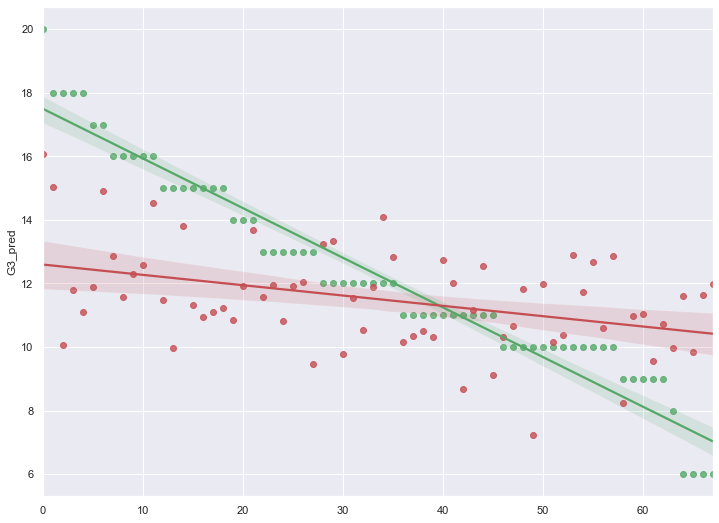

In [58]:
model_linear = LinearRegression()

parameter_candidates_linear = {'fit_intercept': [True, False]}
grid_search_linear = GridSearchCV(estimator=model_linear, 
                 param_grid=parameter_candidates_linear, 
                 cv=4, 
                 scoring='neg_mean_squared_error') 
grid_search_linear.fit(X_train_grade, y_train_grade)
print('Best score:',grid_search_linear.best_score_) 
y_pred_grade_linear = grid_search_linear.predict(X_test_grade)
y_pred_grade_linear_descaled = MinMaxY.inverse_transform(y_pred_grade_linear.reshape(-1, 1))
print("{} r2 score: {}\n".format(model_linear, r2_score(y_test_grade_descaled, y_pred_grade_linear_descaled)))
print("{} mean squared error: {}\n".format(model_linear, mean_squared_error(y_test_grade_descaled, y_pred_grade_linear_descaled)))

y_results_grade_linear = pd.DataFrame(np.concatenate((y_test_grade_descaled, y_pred_grade_linear_descaled), axis=1), columns = ["G3", "G3_pred"])
y_results_grade_linear.sort_values("G3", ascending=False, inplace=True)

plt.figure(figsize=(12,9))
sns.regplot(x=[i for i in range(0,len(y_results_grade_linear.index))], y=y_results_grade_linear["G3"], color="g")
sns.regplot(x=[i for i in range(0,len(y_results_grade_linear.index))], y=y_results_grade_linear["G3_pred"], color="r")

<b>Still the results are not good. For the last try I will fit MLP Regressor.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_m

Best score: -0.023220116789344113
MLPRegressor(max_iter=1000) r2 score: -0.2993203718970294

MLPRegressor(max_iter=1000) mean squared error: 12.940376679628457

Best parameters: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}


<AxesSubplot:ylabel='G3_pred'>

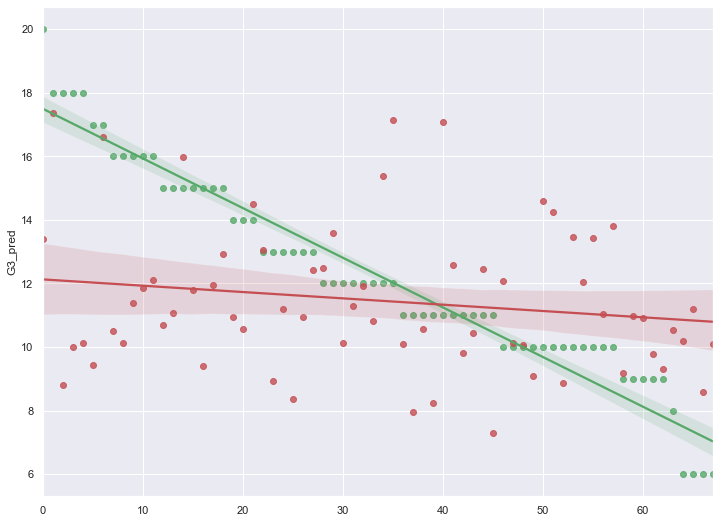

In [59]:
model_MLP = MLPRegressor(max_iter=1000)

parameter_candidates_MLP = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,1)],
                            'activation': ['relu','tanh','logistic'],
                            'alpha': [0.0001, 0.001, 0.1],
                            'learning_rate': ['constant','adaptive'],
                            'solver': ['adam', 'lbfgs', 'sgd']}
grid_search_MLP = GridSearchCV(estimator=model_MLP, 
                 param_grid=parameter_candidates_MLP, 
                 cv=4, 
                 scoring='neg_mean_squared_error') 
grid_search_MLP.fit(X_train_grade, y_train_grade.ravel())
print('Best score:',grid_search_MLP.best_score_) 
y_pred_grade_MLP = grid_search_MLP.predict(X_test_grade)
y_pred_grade_MLP_descaled = MinMaxY.inverse_transform(y_pred_grade_MLP.reshape(-1, 1))
print("{} r2 score: {}\n".format(model_MLP, r2_score(y_test_grade_descaled, y_pred_grade_MLP_descaled)))
print("{} mean squared error: {}\n".format(model_MLP, mean_squared_error(y_test_grade_descaled, y_pred_grade_MLP_descaled)))
print('Best parameters:', grid_search_MLP.best_params_)

y_results_grade_MLP = pd.DataFrame(np.concatenate((y_test_grade_descaled, y_pred_grade_MLP_descaled), axis=1), columns = ["G3", "G3_pred"])
y_results_grade_MLP.sort_values("G3", ascending=False, inplace=True)

plt.figure(figsize=(12,9))
sns.regplot(x=[i for i in range(0,len(y_results_grade_MLP.index))], y=y_results_grade_MLP["G3"], color="g")
sns.regplot(x=[i for i in range(0,len(y_results_grade_MLP.index))], y=y_results_grade_MLP["G3_pred"], color="r")

<h2>There are differences in achieved results and MLP seems to catch the trend best, but still all of these are very poor.<br>
    The final results of the task that we defined after data analysis (predicting G3 scores without taking G2 and G1 into consideration; predicting zero scores is a priority) is that predicting scoring zero in the test is surprisingly accurate, whereas exact score is quite unpredictable. We can mainly guess if a student scored above or below an average grade (and even that not very well).</h2><br>
    <br>
    <b>My decision to not take G1 and G2 into consideration was based on how strongly correlated periods grade were. However, let us see how weel we are able to predict G3 by fitting all given data.</b><br>
    <br>

I will perform only exact grade prediciton on a dataset with removed zero grades since zero grade classification went well.

In [60]:
#Get our initial dataset with coversed values and get rid of additional "zero" columns.
dataset.drop(columns=["G2_zero", "G3_zero"], inplace=True)

#Drop examples with zero G3 grade
dataset.drop(dataset[dataset["G3"]==0].index, inplace=True)

#Get our X matrix and y vetor
X_all = dataset.drop(columns=["G3"])
y_all = dataset["G3"]

#Make train and test sets (this time we skip stratifying)
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, train_size=0.8, random_state=0)

#Let us try to skip scaling


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stoch

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_m

Best score: -0.7273581991891556
MLPRegressor(max_iter=1000) r2 score: 0.9143908896092663

MLPRegressor(max_iter=1000) mean squared error: 0.8150700718451112



<AxesSubplot:ylabel='G3_pred'>

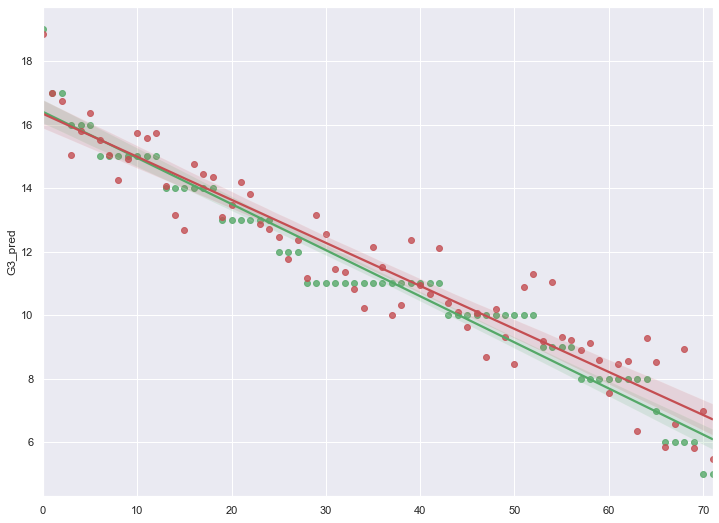

In [61]:
model_MLP = MLPRegressor(max_iter=1000)

parameter_candidates_MLP = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,1)],
          'activation': ['relu','tanh','logistic'],
          'alpha': [0.0001, 0.001, 0.1],
          'learning_rate': ['constant','adaptive'],
          'solver': ['adam', 'lbfgs', 'sgd']}
grid_search_MLP = GridSearchCV(estimator=model_MLP, 
                 param_grid=parameter_candidates_MLP, 
                 cv=4, 
                 scoring='neg_mean_squared_error') 
grid_search_MLP.fit(X_train_all, y_train_all.values.ravel())
print('Best score:',grid_search_MLP.best_score_) 
y_pred_all_MLP = grid_search_MLP.predict(X_test_all)
print("{} r2 score: {}\n".format(model_MLP, r2_score(y_test_all, y_pred_all_MLP)))
print("{} mean squared error: {}\n".format(model_MLP, mean_squared_error(y_test_all, y_pred_all_MLP)))

y_results_all_MLP = pd.DataFrame(y_test_all)
y_results_all_MLP["G3_pred"]= y_pred_all_MLP.tolist()
y_results_all_MLP.sort_values("G3", ascending=False, inplace=True)

plt.figure(figsize=(12,9))
sns.regplot(x=[i for i in range(0,len(y_results_all_MLP))], y=y_results_all_MLP["G3"], color="g")
sns.regplot(x=[i for i in range(0,len(y_results_all_MLP))], y=y_results_all_MLP["G3_pred"], color="r")

In [62]:
print('Best parameters:', grid_search_MLP.best_params_)

Best parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}


<h2>Well, without further searching for better algorithm - prediction improvement is easily visible. Just as expected.</h2><br>
Large number of warnings in the last model fitting could probably be avoided by data scaling, but this is only for demonstrative purpose.

<i>As a commentary - I decided not to use feature selection as I consider this project big enough for demonstrative purposes.